<a href="https://colab.research.google.com/github/Labani4321/Data-Science/blob/main/Mini_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement
With the growth of e-commerce websites, people and financial companies rely on online services
to carry out their transactions that have led to an exponential increase in the credit card frauds
1. Fraudulent credit card transactions lead to a loss of huge amount of money. The design of an effective fraud detection system is necessary in order to reduce the losses incurred by the customers and financial companies
2. Research has been done on many models and methods to
prevent and detect credit card frauds. Some credit card fraud transaction datasets contain the problem of imbalance in datasets. A good fraud detection system should be able to identify the fraud transaction accurately and should make the detection possible in real-time transactions.

### About the Dataset
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

## Data Dictionary<br>
trans_date_trans_time -> Transaction time stamp<br>
cc_num -> Credit card number<br>
merchant -> merchant name<br>
category -> transaction category<br>
amt -> Transaction amount<br>
first -> First name of card holder<br>
last -> Last name of card holder<br>
gender -> Sex of card holder<br>
street -> transaction address<br>
city -> transaction city<br>
state -> transaction state<br>
zip -> transaction zipcode<br>
lat -> transaction lattitude<br>
long -> transaction longitude<br>
city_pop -> Population of the city<br>
job -> job of the card holder<br>
dob -> date of birth of card holder<br>
trans_num -> transaction number of transaction<br>
unix_time -> time in unix format<br>
merch_lat -> lattitude of the merchant<br>
merch_long -> longitude of merchant<br>
is_fraud -> nature of transaction (fraud or not fraud)<br>

## Our Goals:
1. Understand the little distribution of the "little" data that was provided to us.
2.Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm)
3. Determine the Classifiers we are going to use and decide which one has a higher accuracy.

### 1. Import libraries

In [ ]:
# Data preprocessing libraries
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

import os
import sqlite3
import math
from collections import Counter
from pathlib import Path
from tqdm import tqdm

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

# Model
from scipy.stats import skew
import yellowbrick
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Config
mpl.rcParams['font.family'] = 'monospace'
sns.set_theme(style="white", palette=None)
plotly.offline.init_notebook_mode()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
%matplotlib inline

# Data preprocessing

In [ ]:
# Reading csv files and drop the first column
fraud = pd.read_csv("fraudTrain.csv")


fraud_test = pd.read_csv("fraudTest.csv")


# First view 10 rows
fraud.head(10)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   
5           5   2019-01-01 00:04:08  4767265376804500   
6           6   2019-01-01 00:04:42    30074693890476   
7           7   2019-01-01 00:05:08  6011360759745864   
8           8   2019-01-01 00:05:18  4922710831011201   
9           9   2019-01-01 00:06:01  2720830304681674   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   
5    fraud_Stroman, Hudson and Erdman  gas_transport   94.63   Jennifer   
6               fraud_Rowe-Vandervort    grocery_net   44.54     Kelsey   
7                fraud_Corwin-Collins  gas_transport   71.65     Steven   
8                    fraud_Herzog Ltd       misc_pos    4.27    Heather   
9   fraud_Schoen, Kuphal and Nitzsche    grocery_pos  198.39    Melissa   

       last gender                          street  ...      lat      long  \
0     Banks      F                  561 Perry Cove  ...  36.0788  -81.1781   
1      Gill      F    43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2   Sanchez      M        594 White Dale Suite 530  ...  42.1808 -112.2620   
3     White      M     9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4    Garcia      M                408 Bradley Rest  ...  38.4207  -79.4629   
5    Conner      F               4655 David Island  ...  40.3750  -75.2045   
6  Richards      F     889 Sarah Station Suite 624  ...  37.9931 -100.9893   
7  Williams      M       231 Flores Pass Suite 720  ...  38.8432  -78.6003   
8     Chase      F     6888 Hicks Stream Suite 954  ...  40.3359  -79.6607   
9   Aguilar      F  21326 Taylor Squares Suite 708  ...  36.5220  -87.3490   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   
5      2158                  Transport planner  1961-06-19   
6      2691                    Arboriculturist  1993-08-16   
7      6018               Designer, multimedia  1947-08-21   
8      1472          Public affairs consultant  1941-03-07   
9    151785                        Pathologist  1974-03-28   

                          trans_num     unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1.325376e+09  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1.325376e+09  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1.325376e+09  37.162705 -100.153370   
7  6d294ed2cc447d2c71c7171a3d54967c  1.325376e+09  38.948089  -78.540296   
8  fc28024ce480f8ef21a32d64c93a29f5  1.325376e+09  40.351813  -79.958146   
9  3b9014ea8fb80bd65de0b1463b00b00e  1.325376e+09  37.179198  -87.485381   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  
6       0.0  
7       0.0  
8       0.0  
9       0.0  

[10 rows x 23 c

In [ ]:
fraud.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## Exploratory Data Analysis
1. Univariate Analysis
2. Bivariate Analysis
3. Data Cleaning
4. Outlier Treatment
5. Variable Transformation

In [ ]:
# checking for various columns and nulls in the dataset
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120490 entries, 0 to 120489
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             120490 non-null  int64  
 1   trans_date_trans_time  120490 non-null  object 
 2   cc_num                 120490 non-null  int64  
 3   merchant               120490 non-null  object 
 4   category               120490 non-null  object 
 5   amt                    120490 non-null  float64
 6   first                  120490 non-null  object 
 7   last                   120490 non-null  object 
 8   gender                 120490 non-null  object 
 9   street                 120490 non-null  object 
 10  city                   120490 non-null  object 
 11  state                  120490 non-null  object 
 12  zip                    120490 non-null  int64  
 13  lat                    120490 non-null  float64
 14  long                   120490 non-nu

In [ ]:
# checking % of data provided by Kaggle in the train & test
1296675 * 100 / (1296675 + 555719)

69.99995681264353



*   70% data is present in the train dataset and remaining 30% in the test dataset.
*   No null values in either of the files




In [ ]:
# Check for imbalance on target variable in the train dataset
fraud.is_fraud.value_counts(normalize=True)

is_fraud
0.0    0.990472
1.0    0.009528
Name: proportion, dtype: float64

Fraud Distribution
is_fraud
0.0    0.990472
1.0    0.009528
Name: proportion, dtype: float64


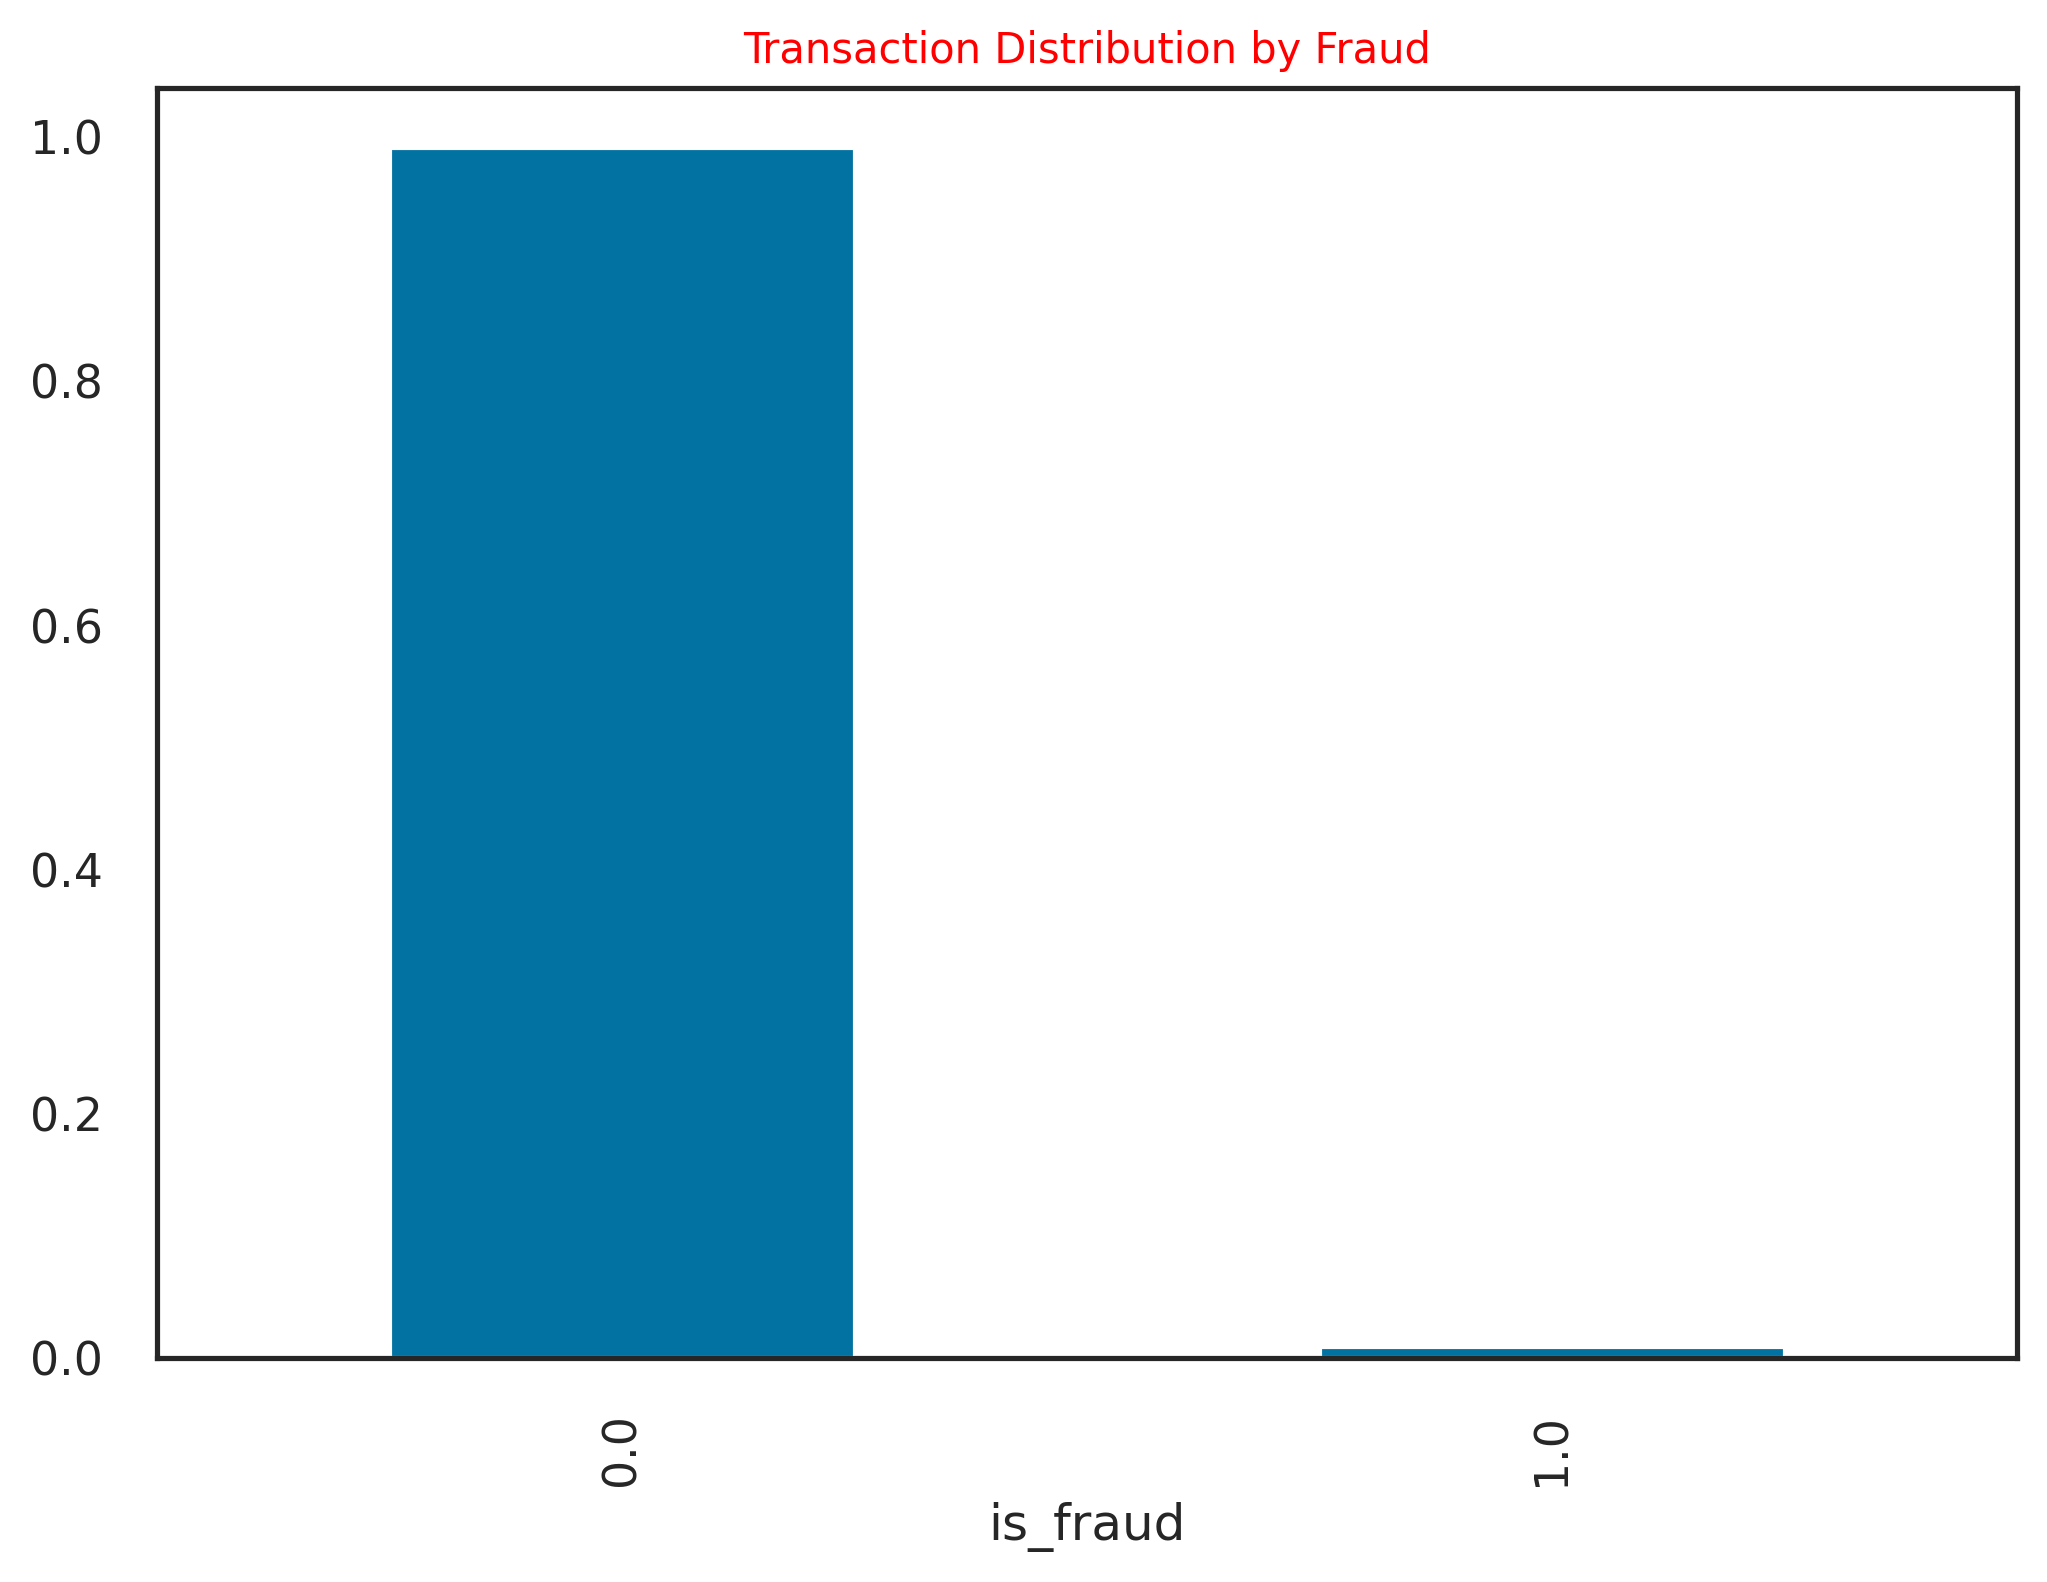

In [ ]:
# Check for imbalance on target variable in the main dataset
print ('Fraud Distribution')
print (fraud.is_fraud.value_counts(normalize=True))
plt.title('Transaction Distribution by Fraud', fontsize= 10, color = 'Red', fontweight = 100)
fraud.is_fraud.value_counts(normalize=True).plot.bar()
plt.show()

In [ ]:
# Check for imbalance on target variable in the test dataset
fraud_test.is_fraud.value_counts(normalize=True)

is_fraud
0.0    0.995796
1.0    0.004204
Name: proportion, dtype: float64

Both the datasets have high imbalnce of the target variable with the test dataset having slightly higher imbalance. At this point, lets keep the test data seperate. We will be building the model on the train dataset. If required, a validation dataset will be carved from it. The final evaluation will be done on the test dataset.

## Univariate Analysis
The following columns seems of very less/ no significance in determining a fraud case. Primary reason being no model can be created based on person's name or his PII or some unique ID/ S.no. assigned. Hence, dropping them:-

1. cc_num
2. first
3. last
4. street
5. trans_num

In [ ]:
# Dropping the unwanted columns from both datasets
fraud.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud.drop(fraud.iloc[:,[0]], axis=1, inplace=True)
fraud_test.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud_test.drop(fraud_test.iloc[:,[0]], axis=1, inplace=True)

In [ ]:
# Inspecting the fraud dataset
fraud.head()

trans_date_trans_time                            merchant       category  \
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

      amt gender            city state    zip      lat      long  city_pop  \
0    4.97      F  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1  107.23      F          Orient    WA  99160  48.8878 -118.2105       149   
2  220.11      M      Malad City    ID  83252  42.1808 -112.2620      4154   
3   45.00      M         Boulder    MT  59632  46.2306 -112.1138      1939   
4   41.96      M        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job         dob     unix_time  merch_lat  \
0          Psychologist, counselling  1988-03-09  1.325376e+09  36.011293   
1  Special educational needs teacher  1978-06-21  1.325376e+09  49.159047   
2        Nature conservation officer  1962-01-19  1.325376e+09  43.150704   
3                    Patent attorney  1967-01-12  1.325376e+09  47.034331   
4     Dance movement psychotherapist  1986-03-28  1.325376e+09  38.674999   

   merch_long  is_fraud  
0  -82.048315       0.0  
1 -118.186462       0.0  
2 -112.154481       0.0  
3 -112.561071       0.0  
4  -78.632459       0.0

In [ ]:
# Inspecting the fraud test dataset
fraud_test.head()

trans_date_trans_time                              merchant        category  \
0   2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1   2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2   2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3   2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4   2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

     amt gender        city state      zip      lat      long  city_pop  \
0   2.86      M    Columbia    SC  29209.0  33.9659  -80.9355  333497.0   
1  29.84      F     Altonah    UT  84002.0  40.3207 -110.4360     302.0   
2  41.28      F    Bellmore    NY  11710.0  40.6729  -73.5365   34496.0   
3  60.05      M  Titusville    FL  32780.0  28.5697  -80.8191   54767.0   
4   3.19      M    Falmouth    MI  49632.0  44.2529  -85.0170    1126.0   

                      job         dob     unix_time  merch_lat  merch_long  \
0     Mechanical engineer  1968-03-19  1.371817e+09  33.986391  -81.200714   
1  Sales professional, IT  1990-01-17  1.371817e+09  39.450498 -109.960431   
2       Librarian, public  1970-10-21  1.371817e+09  40.495810  -74.196111   
3            Set designer  1987-07-25  1.371817e+09  28.812398  -80.883061   
4      Furniture designer  1955-07-06  1.371817e+09  44.959148  -85.884734   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

In [ ]:
# Converting dob to age
from datetime import date
import pandas as pd
import numpy as np

fraud['dob'] = pd.to_datetime(fraud['dob'])
# Calculate age using days and then convert to years
fraud['age'] = (pd.to_datetime('now') - fraud['dob']).dt.days / 365.25

# Fill or drop NaN values in 'age' before converting to integer
fraud['age'] = fraud['age'].fillna(-1) # Replace NaN with -1, or any suitable placeholder
fraud['age'] = fraud['age'].astype(int) # Now convert to integer

fraud.drop(['dob'], axis=1, inplace=True)
fraud.head()

trans_date_trans_time                            merchant       category  \
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

      amt gender            city state    zip      lat      long  city_pop  \
0    4.97      F  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1  107.23      F          Orient    WA  99160  48.8878 -118.2105       149   
2  220.11      M      Malad City    ID  83252  42.1808 -112.2620      4154   
3   45.00      M         Boulder    MT  59632  46.2306 -112.1138      1939   
4   41.96      M        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job     unix_time  merch_lat  merch_long  \
0          Psychologist, counselling  1.325376e+09  36.011293  -82.048315   
1  Special educational needs teacher  1.325376e+09  49.159047 -118.186462   
2        Nature conservation officer  1.325376e+09  43.150704 -112.154481   
3                    Patent attorney  1.325376e+09  47.034331 -112.561071   
4     Dance movement psychotherapist  1.325376e+09  38.674999  -78.632459   

   is_fraud  age  
0       0.0   36  
1       0.0   46  
2       0.0   62  
3       0.0   57  
4       0.0   38

In [ ]:
# Same change on the test dataset
fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])
# Calculate age using days and then convert to years (similar to how it's done for 'fraud' DataFrame)
fraud_test['age'] = (pd.to_datetime('now') - fraud_test['dob']).dt.days / 365.25

# Fill or drop NaN values in 'age' before converting to integer
fraud_test['age'] = fraud_test['age'].fillna(-1) # Replace NaN with -1
fraud_test['age'] = fraud_test['age'].astype(int)

fraud_test.drop(['dob'], axis=1, inplace=True)
fraud_test.head()

trans_date_trans_time                              merchant        category  \
0   2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1   2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2   2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3   2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4   2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

     amt gender        city state      zip      lat      long  city_pop  \
0   2.86      M    Columbia    SC  29209.0  33.9659  -80.9355  333497.0   
1  29.84      F     Altonah    UT  84002.0  40.3207 -110.4360     302.0   
2  41.28      F    Bellmore    NY  11710.0  40.6729  -73.5365   34496.0   
3  60.05      M  Titusville    FL  32780.0  28.5697  -80.8191   54767.0   
4   3.19      M    Falmouth    MI  49632.0  44.2529  -85.0170    1126.0   

                      job     unix_time  merch_lat  merch_long  is_fraud  age  
0     Mechanical engineer  1.371817e+09  33.986391  -81.200714       0.0   56  
1  Sales professional, IT  1.371817e+09  39.450498 -109.960431       0.0   34  
2       Librarian, public  1.371817e+09  40.495810  -74.196111       0.0   54  
3            Set designer  1.371817e+09  28.812398  -80.883061       0.0   37  
4      Furniture designer  1.371817e+09  44.959148  -85.884734       0.0   69

In [ ]:
# Seggregating data and time from trans_date_trans_time field
fraud['trans_date'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).date
fraud['trans_time'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).time
fraud.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud.head()

merchant       category     amt gender  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                fraud_Lind-Buckridge  entertainment  220.11      M   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                 fraud_Keeling-Crist       misc_pos   41.96      M   

             city state    zip      lat      long  city_pop  \
0  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1          Orient    WA  99160  48.8878 -118.2105       149   
2      Malad City    ID  83252  42.1808 -112.2620      4154   
3         Boulder    MT  59632  46.2306 -112.1138      1939   
4        Doe Hill    VA  24433  38.4207  -79.4629        99   

                                 job     unix_time  merch_lat  merch_long  \
0          Psychologist, counselling  1.325376e+09  36.011293  -82.048315   
1  Special educational needs teacher  1.325376e+09  49.159047 -118.186462   
2        Nature conservation officer  1.325376e+09  43.150704 -112.154481   
3                    Patent attorney  1.325376e+09  47.034331 -112.561071   
4     Dance movement psychotherapist  1.325376e+09  38.674999  -78.632459   

   is_fraud  age  trans_date trans_time  
0       0.0   36  2019-01-01   00:00:18  
1       0.0   46  2019-01-01   00:00:44  
2       0.0   62  2019-01-01   00:00:51  
3       0.0   57  2019-01-01   00:01:16  
4       0.0   38  2019-01-01   00:03:06

In [ ]:
# Same changes on test dataset
fraud_test['trans_date'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).date
fraud_test['trans_time'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).time
fraud_test.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud_test.head()

merchant        category    amt gender  \
0                 fraud_Kirlin and Sons   personal_care   2.86      M   
1                  fraud_Sporer-Keebler   personal_care  29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                     fraud_Haley Group        misc_pos  60.05      M   
4                 fraud_Johnston-Casper          travel   3.19      M   

         city state      zip      lat      long  city_pop  \
0    Columbia    SC  29209.0  33.9659  -80.9355  333497.0   
1     Altonah    UT  84002.0  40.3207 -110.4360     302.0   
2    Bellmore    NY  11710.0  40.6729  -73.5365   34496.0   
3  Titusville    FL  32780.0  28.5697  -80.8191   54767.0   
4    Falmouth    MI  49632.0  44.2529  -85.0170    1126.0   

                      job     unix_time  merch_lat  merch_long  is_fraud  age  \
0     Mechanical engineer  1.371817e+09  33.986391  -81.200714       0.0   56   
1  Sales professional, IT  1.371817e+09  39.450498 -109.960431       0.0   34   
2       Librarian, public  1.371817e+09  40.495810  -74.196111       0.0   54   
3            Set designer  1.371817e+09  28.812398  -80.883061       0.0   37   
4      Furniture designer  1.371817e+09  44.959148  -85.884734       0.0   69   

   trans_date trans_time  
0  2020-06-21   12:14:25  
1  2020-06-21   12:14:33  
2  2020-06-21   12:14:53  
3  2020-06-21   12:15:15  
4  2020-06-21   12:15:17

In [ ]:
# Check on numeric columns for outliers
fraud.describe()

amt            zip            lat           long  \
count  120490.000000  120490.000000  120490.000000  120490.000000   
mean       71.838275   48738.332592      38.534788     -90.186276   
std       150.772014   26900.335317       5.071902      13.757368   
min         1.000000    1257.000000      20.027100    -165.672300   
25%         9.690000   26041.000000      34.620500     -96.798000   
50%        48.070000   48174.000000      39.371600     -87.461600   
75%        83.810000   72011.000000      41.846700     -80.128400   
max     12788.070000   99783.000000      65.689900     -67.950300   

           city_pop     unix_time      merch_lat     merch_long  \
count  1.204900e+05  1.204890e+05  120489.000000  120489.000000   
mean   8.943303e+04  1.328415e+09      38.536751     -90.187415   
std    3.020575e+05  1.729479e+06       5.104835      13.769274   
min    2.300000e+01  1.325376e+09      19.029798    -166.670132   
25%    7.430000e+02  1.326923e+09      34.749091     -96.883584   
50%    2.456000e+03  1.328415e+09      39.365348     -87.410765   
75%    2.047800e+04  1.329983e+09      41.943017     -80.190405   
max    2.906700e+06  1.331270e+09      66.659242     -66.967742   

            is_fraud            age  
count  120489.000000  120490.000000  
mean        0.009528      50.812225  
std         0.097145      17.362702  
min         0.000000      -1.000000  
25%         0.000000      37.000000  
50%         0.000000      49.000000  
75%         0.000000      62.000000  
max         1.000000     100.000000

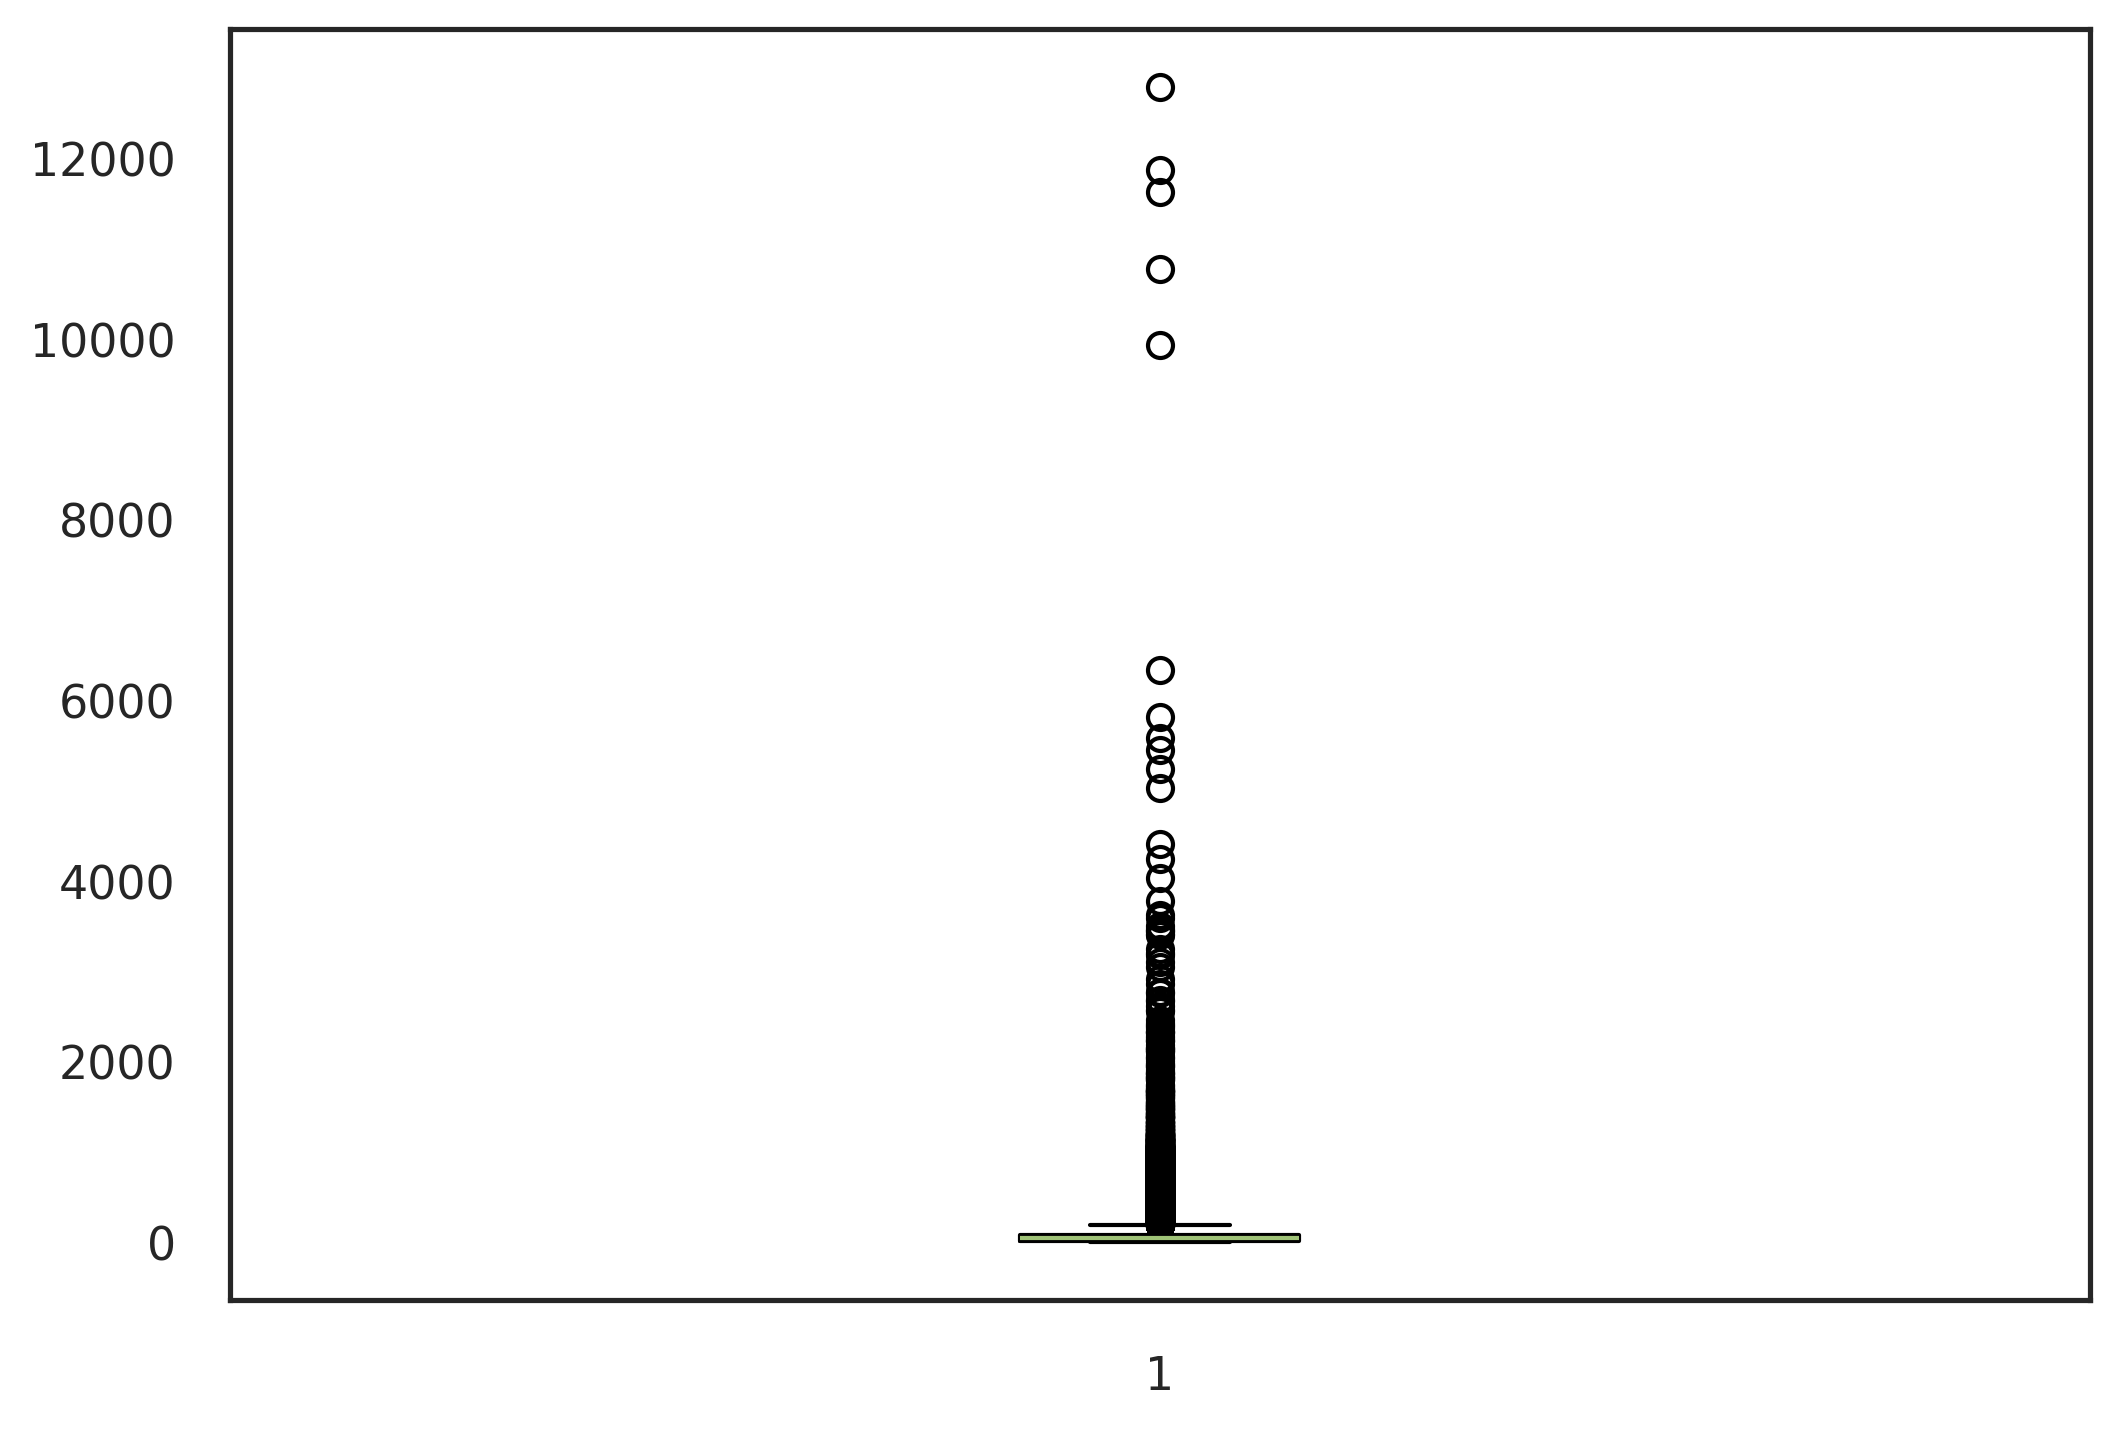

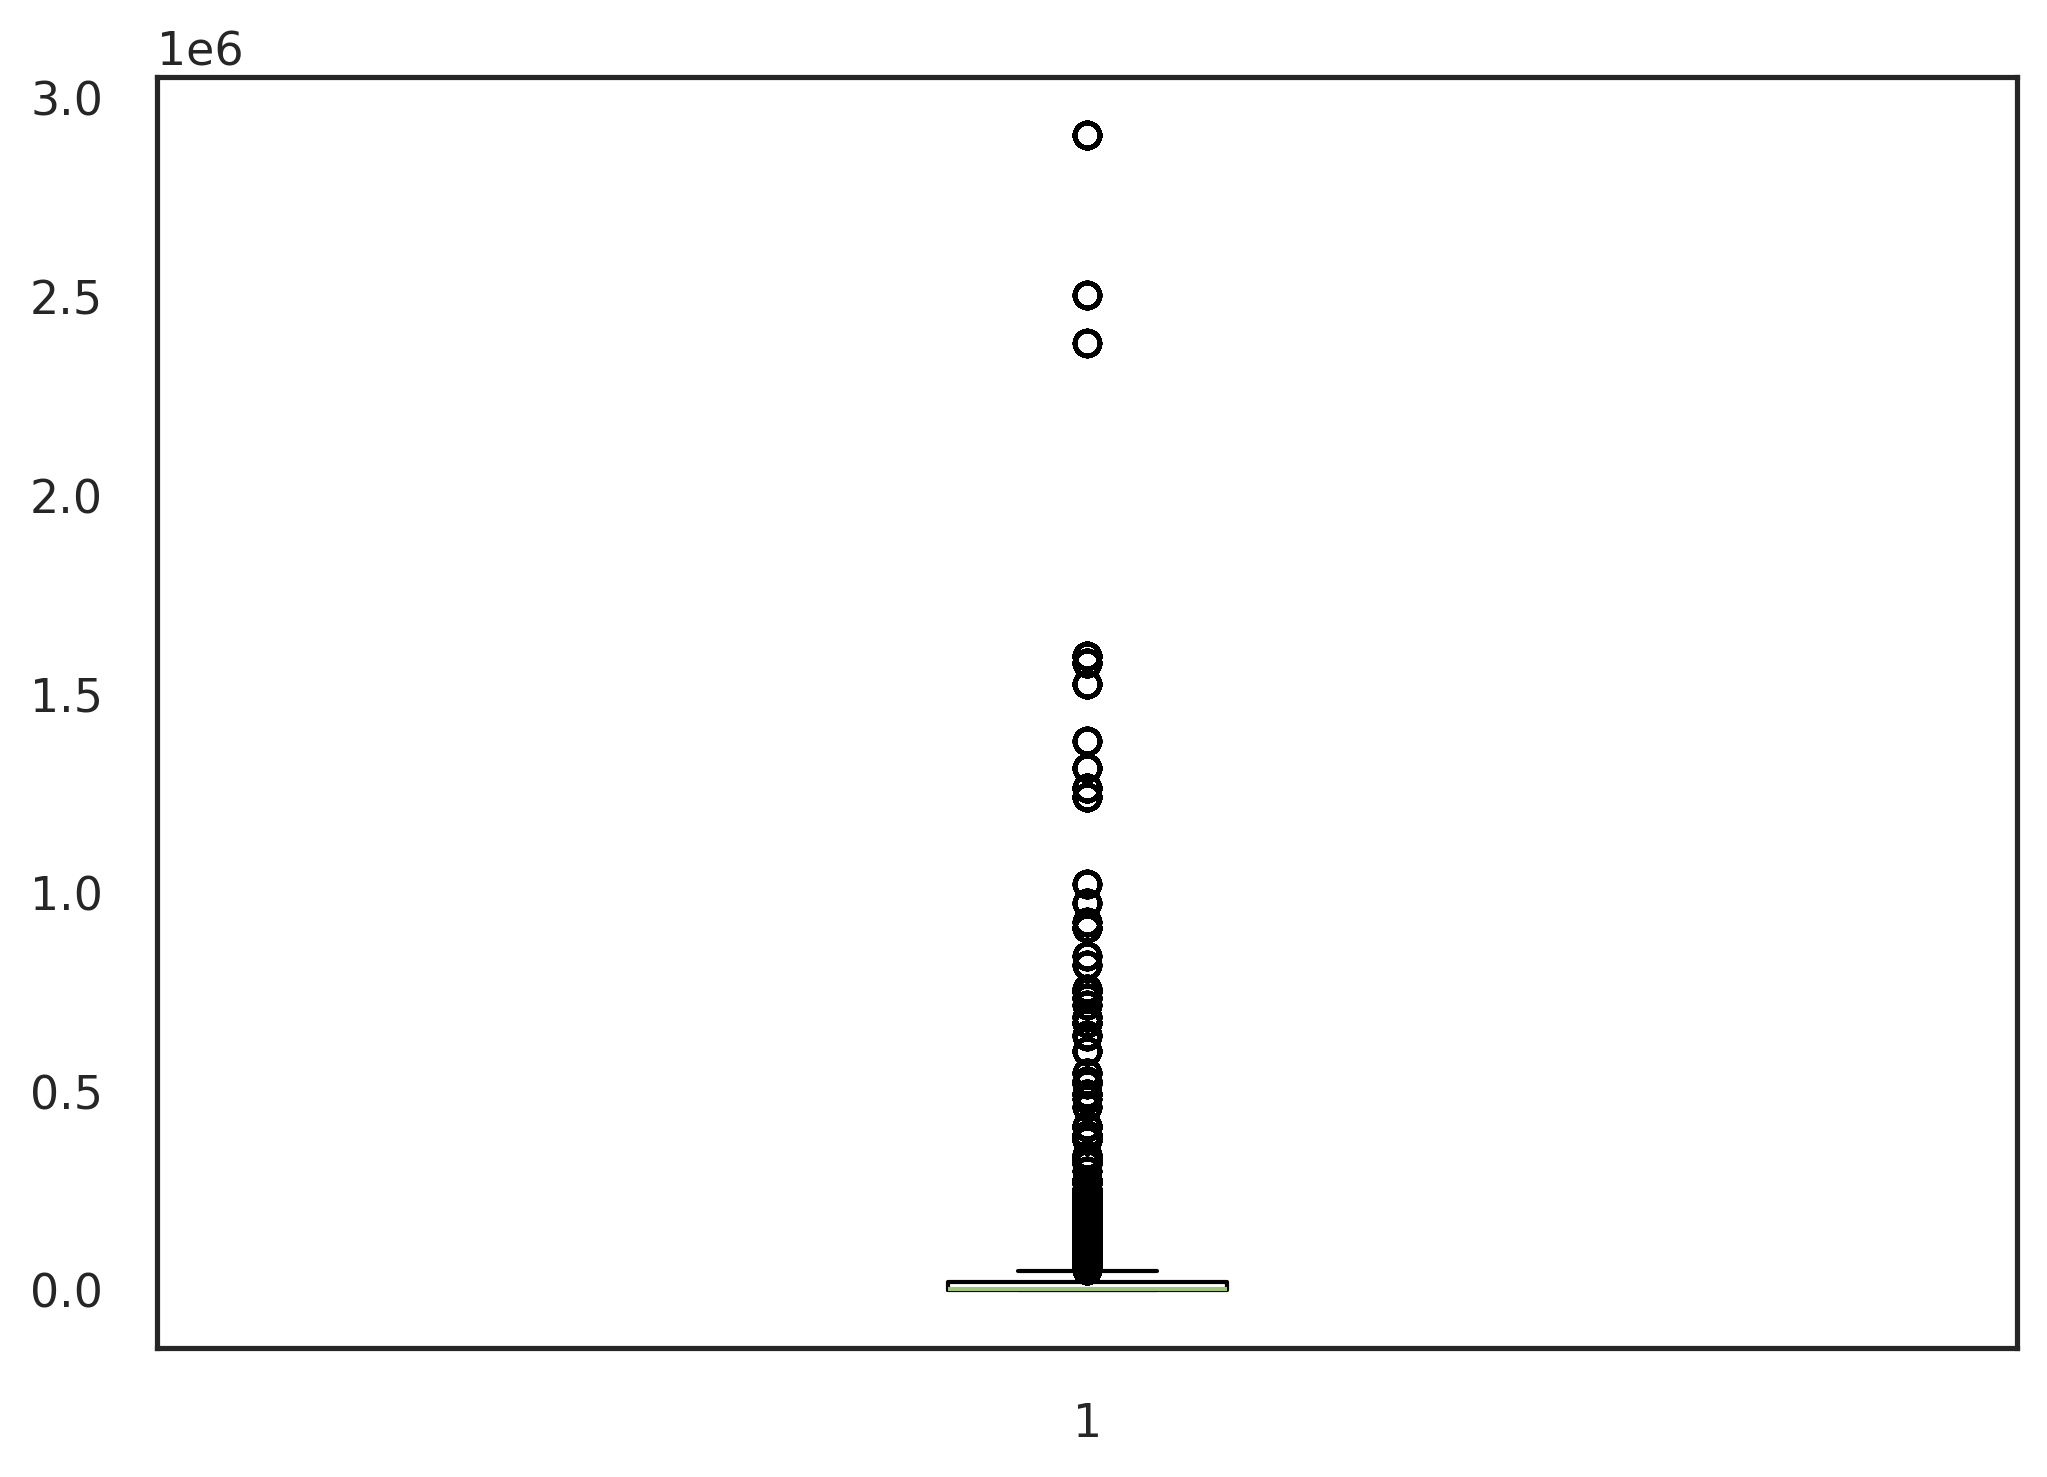

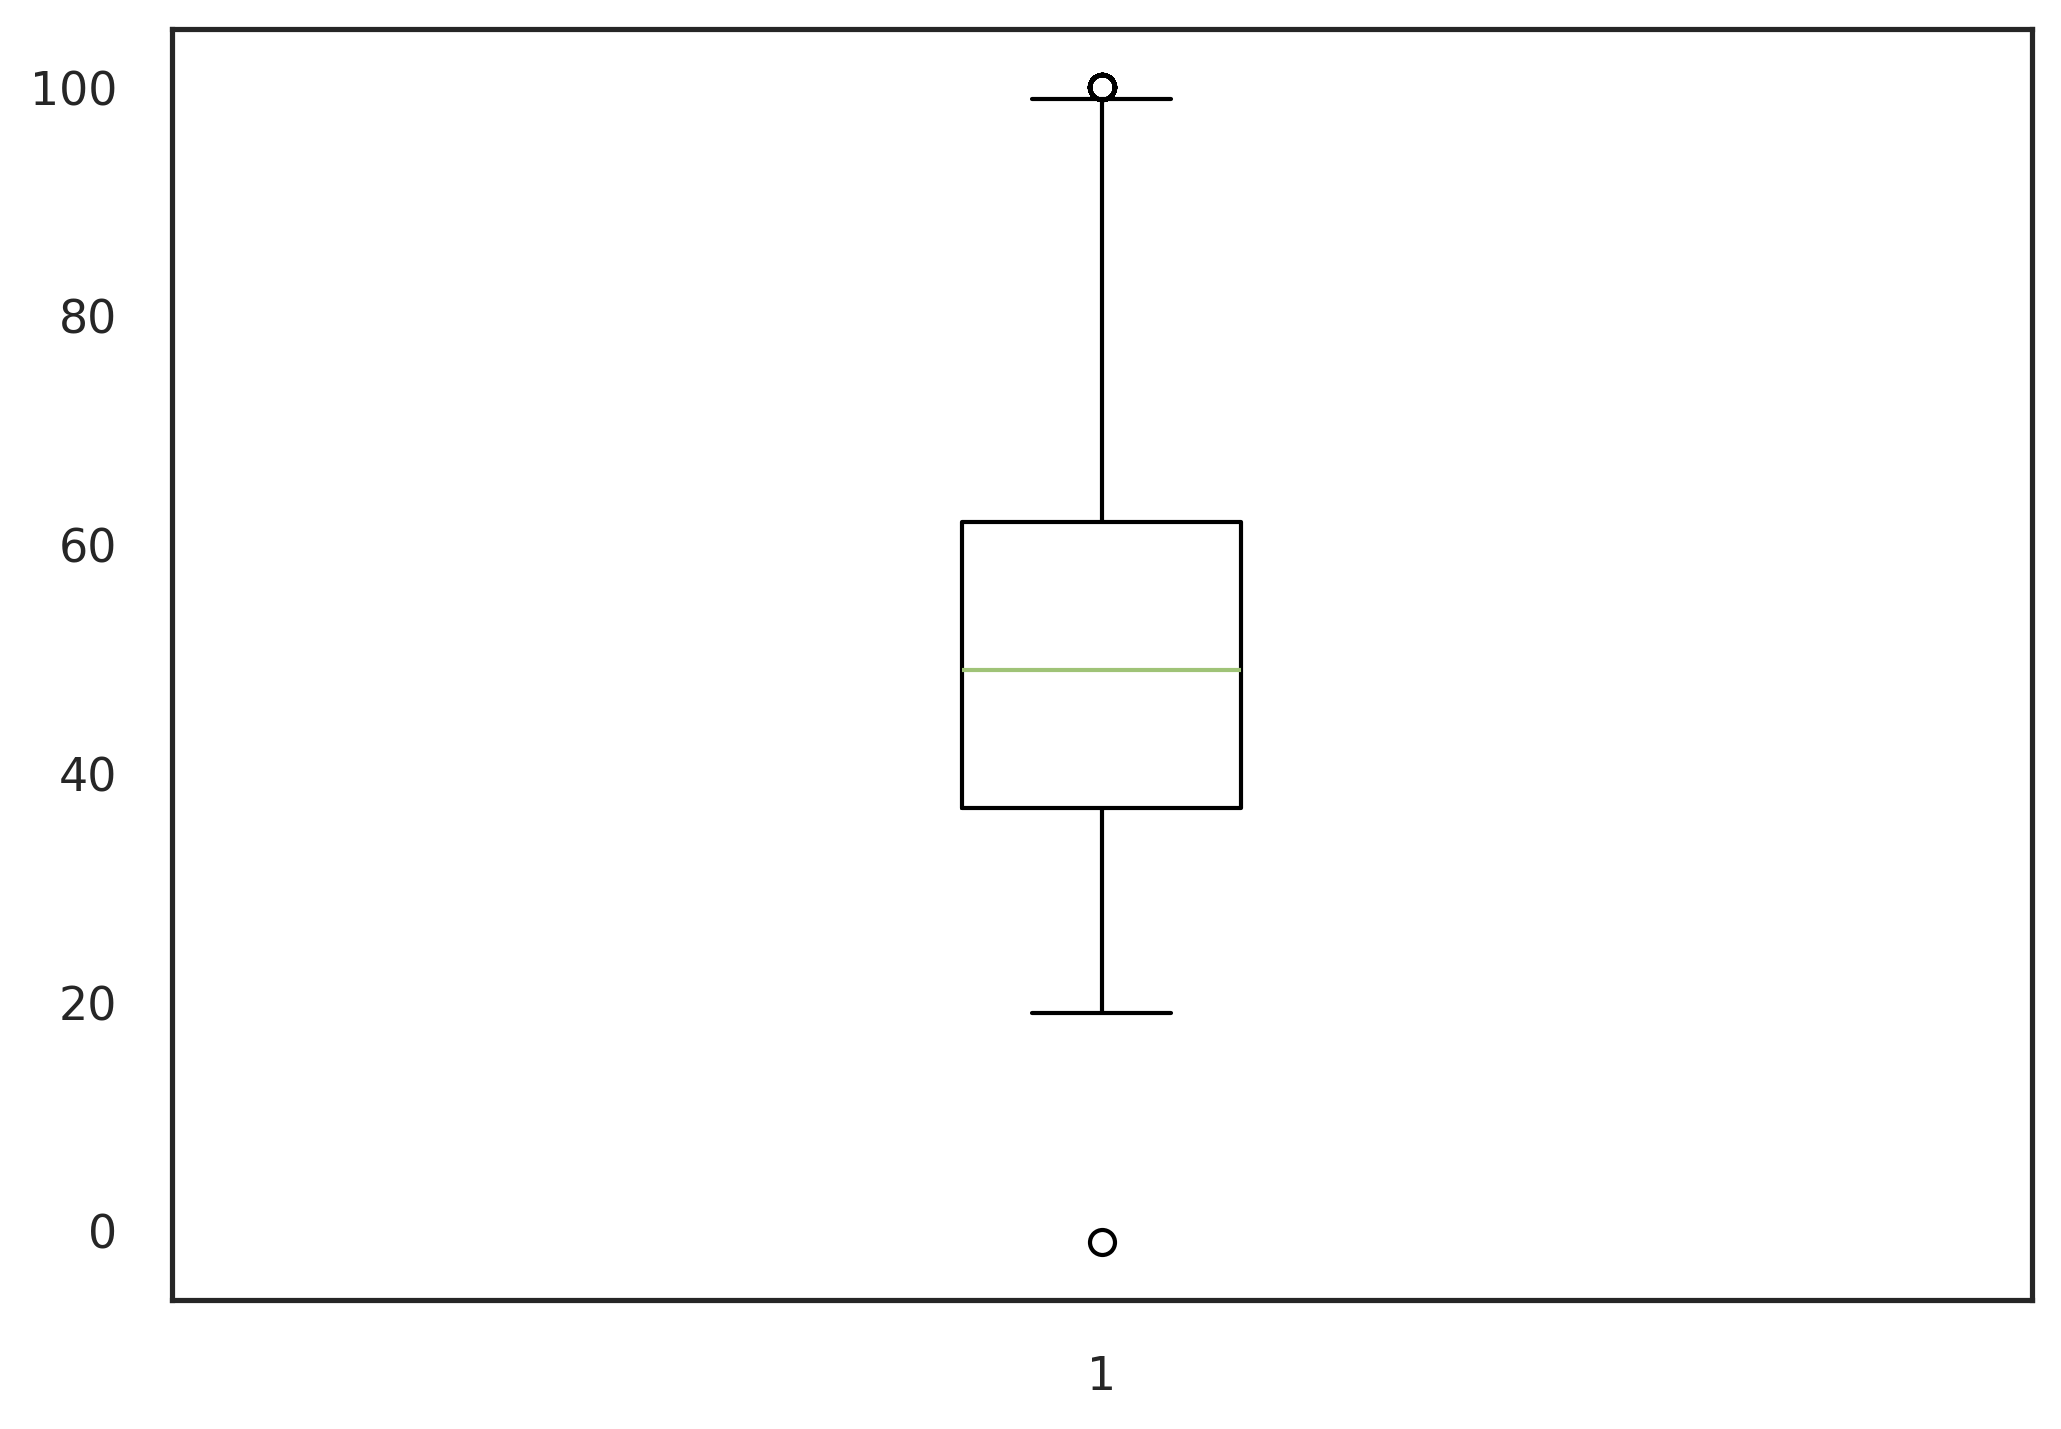

In [ ]:
# Further checking distribution of continuous variables - amt, city_pop and age columns to see if there are any valid outliers
plt.boxplot(fraud.amt)
plt.show()
plt.boxplot(fraud.city_pop)
plt.show()
plt.boxplot(fraud.age)
plt.show()

The age column has no outliers while amt and city_pop stastically shows outliers. However, both amount and city population can vary drastically and none of them seems very high or very low. Hence, we will consider it as valid data.

In [ ]:
# Identifying all the Numeric and non numeric columns
num = []
obj = []
for i in range (0,13):
    if fraud.iloc[:,i].dtype != 'O':
        num.append(i)
    else:
        obj.append(i)
print(num)
print(obj)
col_names = fraud.columns
print(col_names)

[2, 6, 7, 8, 9, 11, 12]
[0, 1, 3, 4, 5, 10]
Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'trans_date', 'trans_time'],
      dtype='object')


In [ ]:
# Checking the distribution of object variables
for i in obj:
    print (col_names[i])
    print (fraud.iloc[:,i].value_counts(normalize=True))
    print ('*' * 50)

merchant
merchant
fraud_Kilback LLC                        0.003187
fraud_Schumm PLC                         0.003013
fraud_Cormier LLC                        0.003004
fraud_Boyer PLC                          0.002805
fraud_Dickinson Ltd                      0.002656
                                           ...   
fraud_Little-Gleichner                   0.000531
fraud_Reichert-Weissnat                  0.000523
fraud_Tromp Group                        0.000506
fraud_Hodkiewicz, Prohaska and Paucek    0.000473
fraud_Kessler Group                      0.000473
Name: proportion, Length: 693, dtype: float64
**************************************************
category
category
gas_transport     0.101693
grocery_pos       0.095029
home              0.094215
shopping_pos      0.090339
kids_pets         0.086132
shopping_net      0.075973
entertainment     0.071998
food_dining       0.071068
personal_care     0.070064
health_fitness    0.067060
misc_pos          0.061092
misc_net          0.

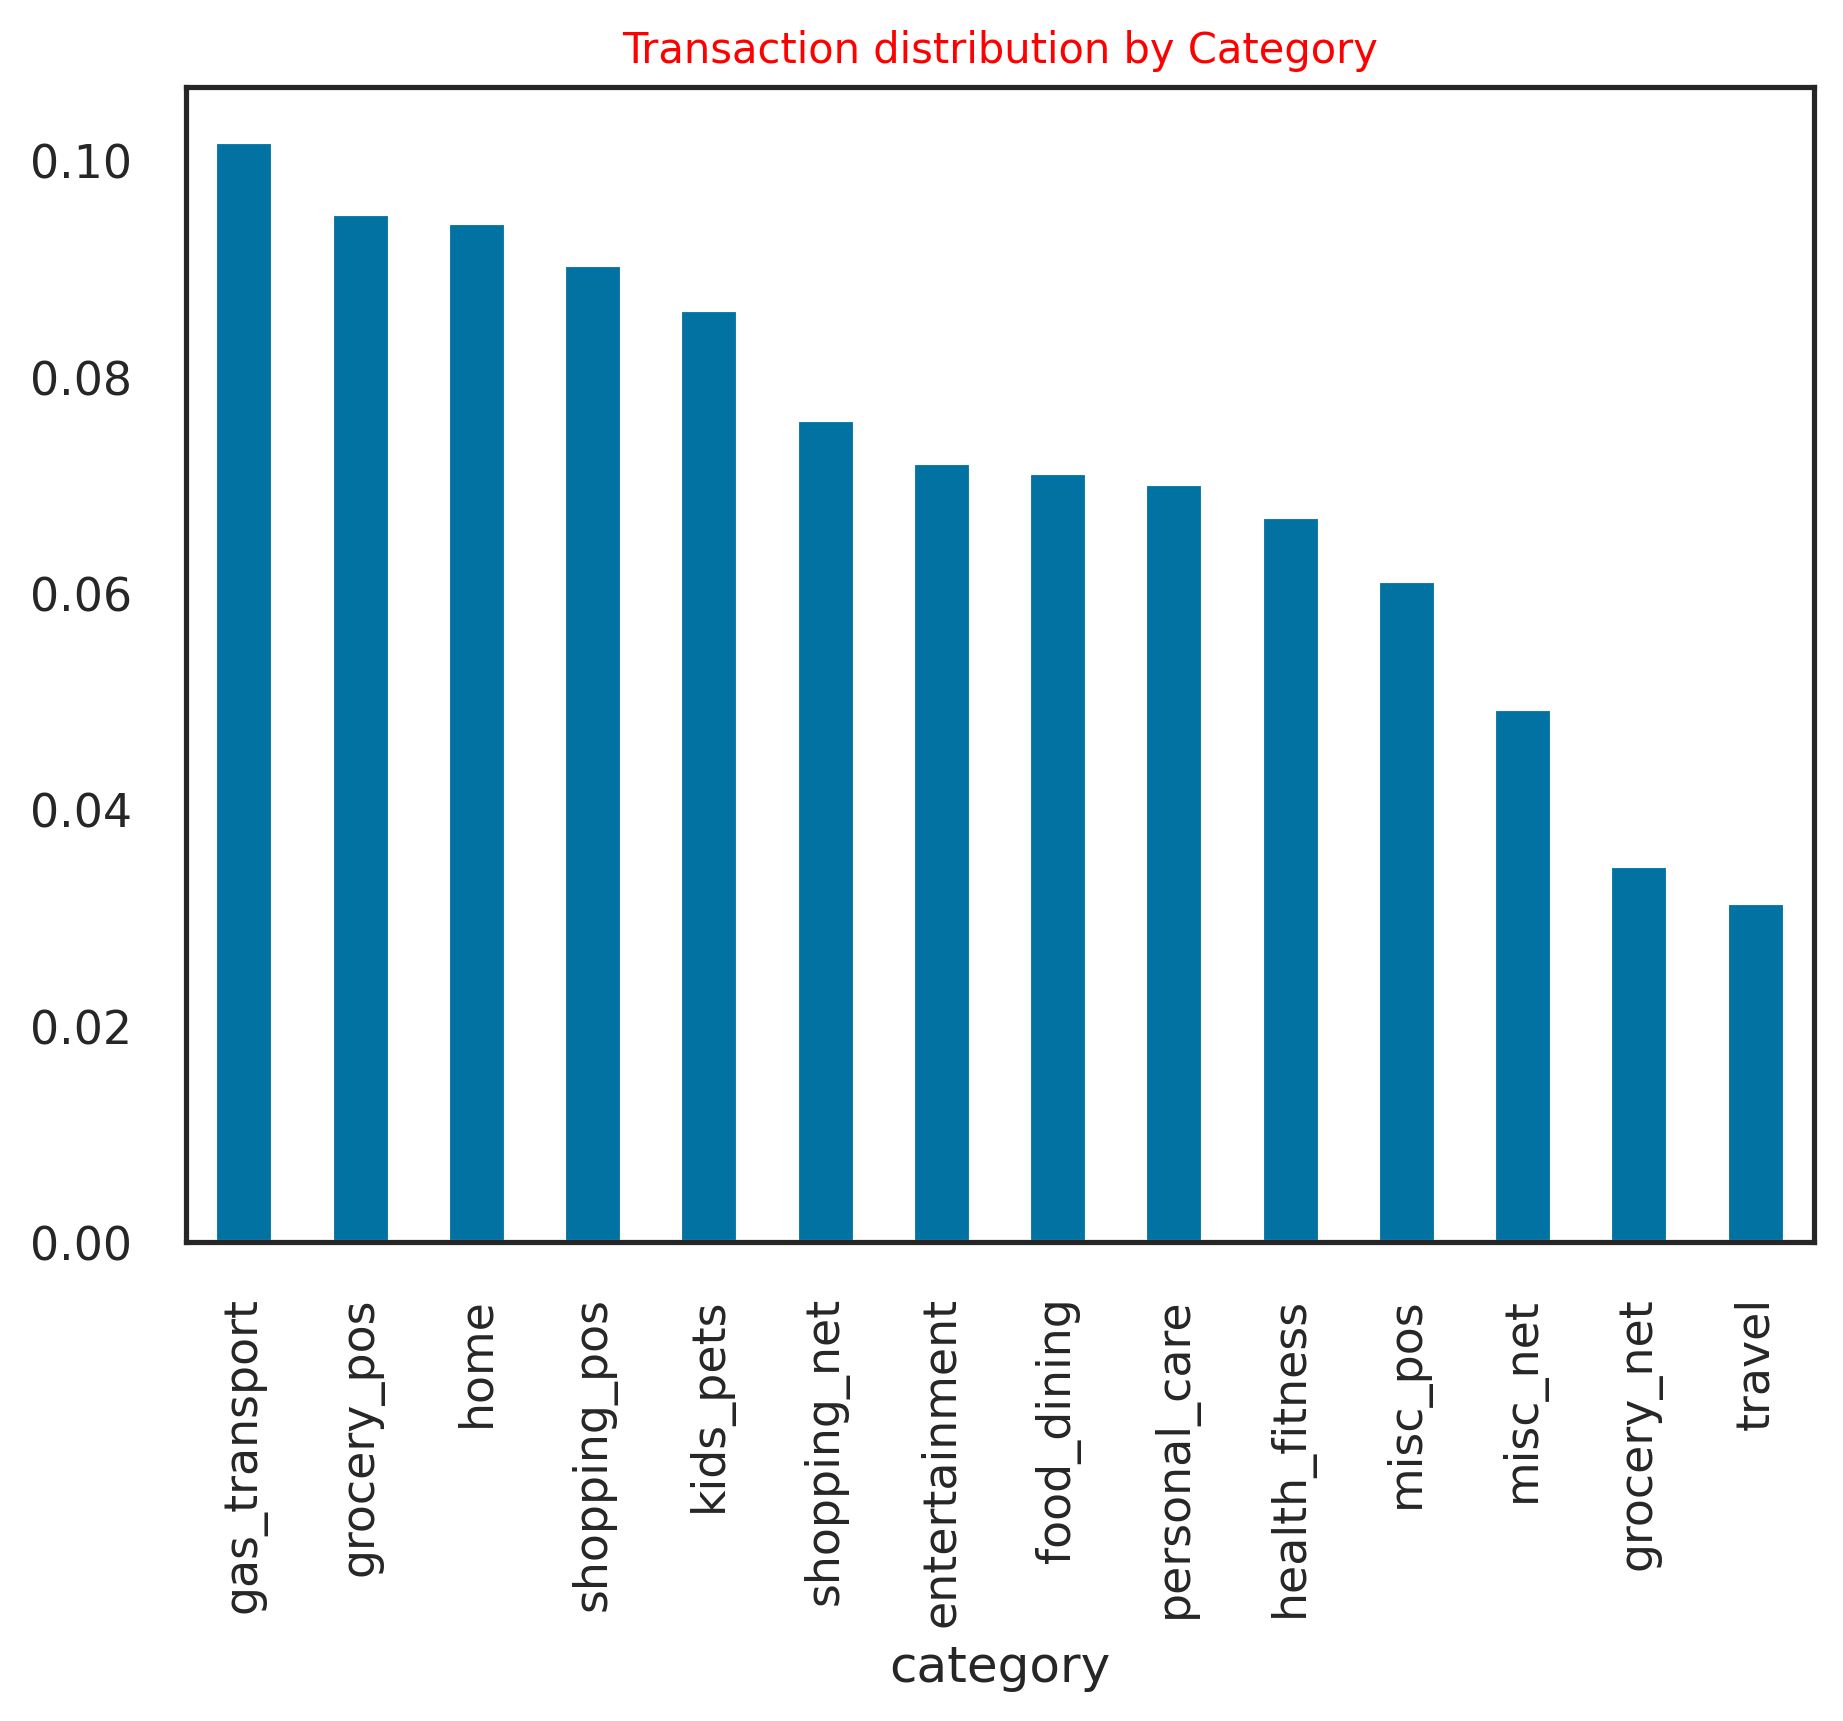

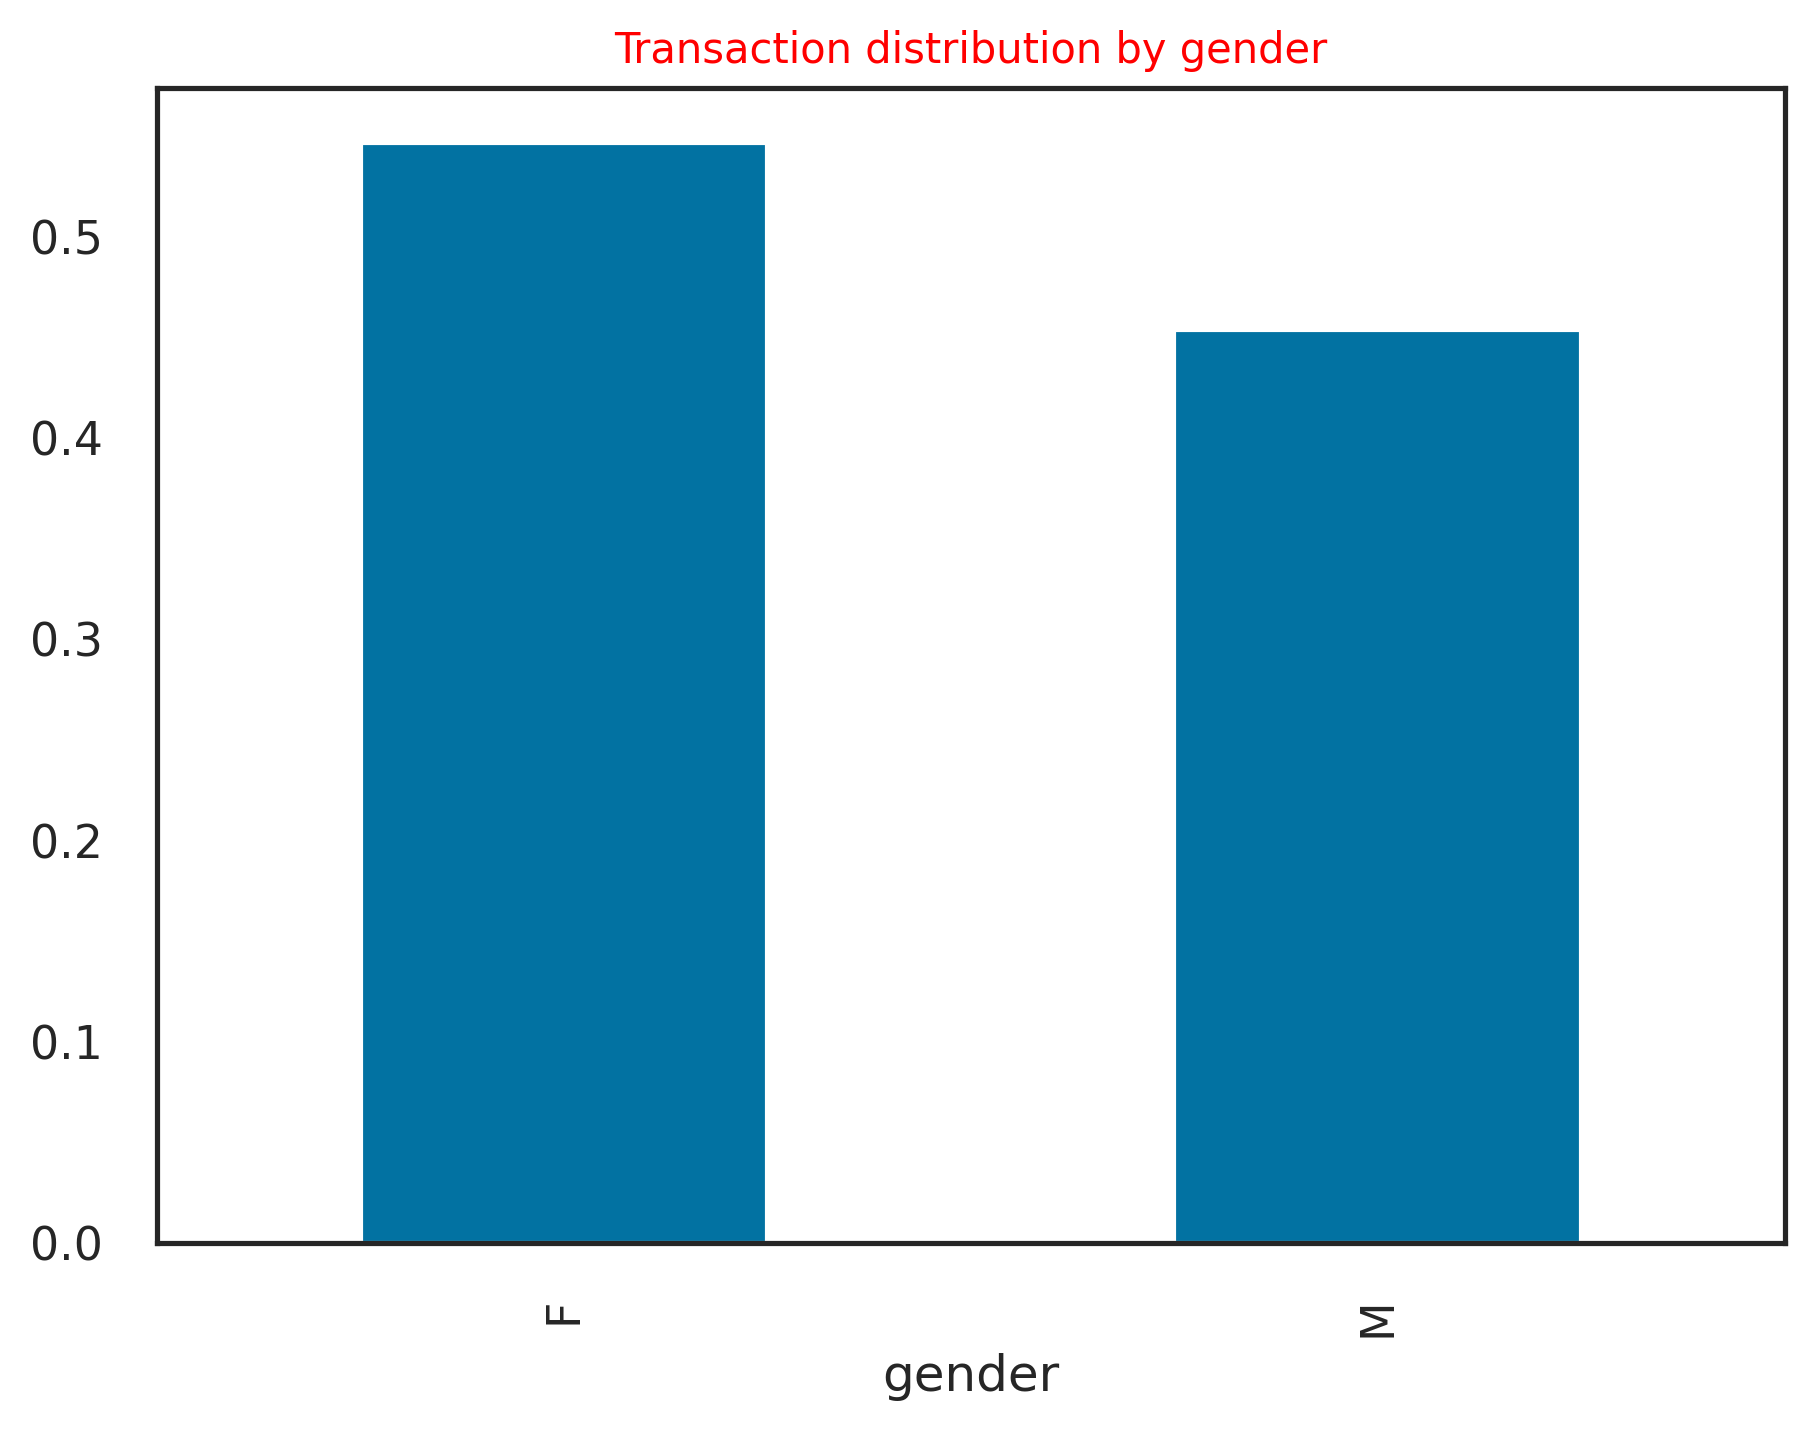

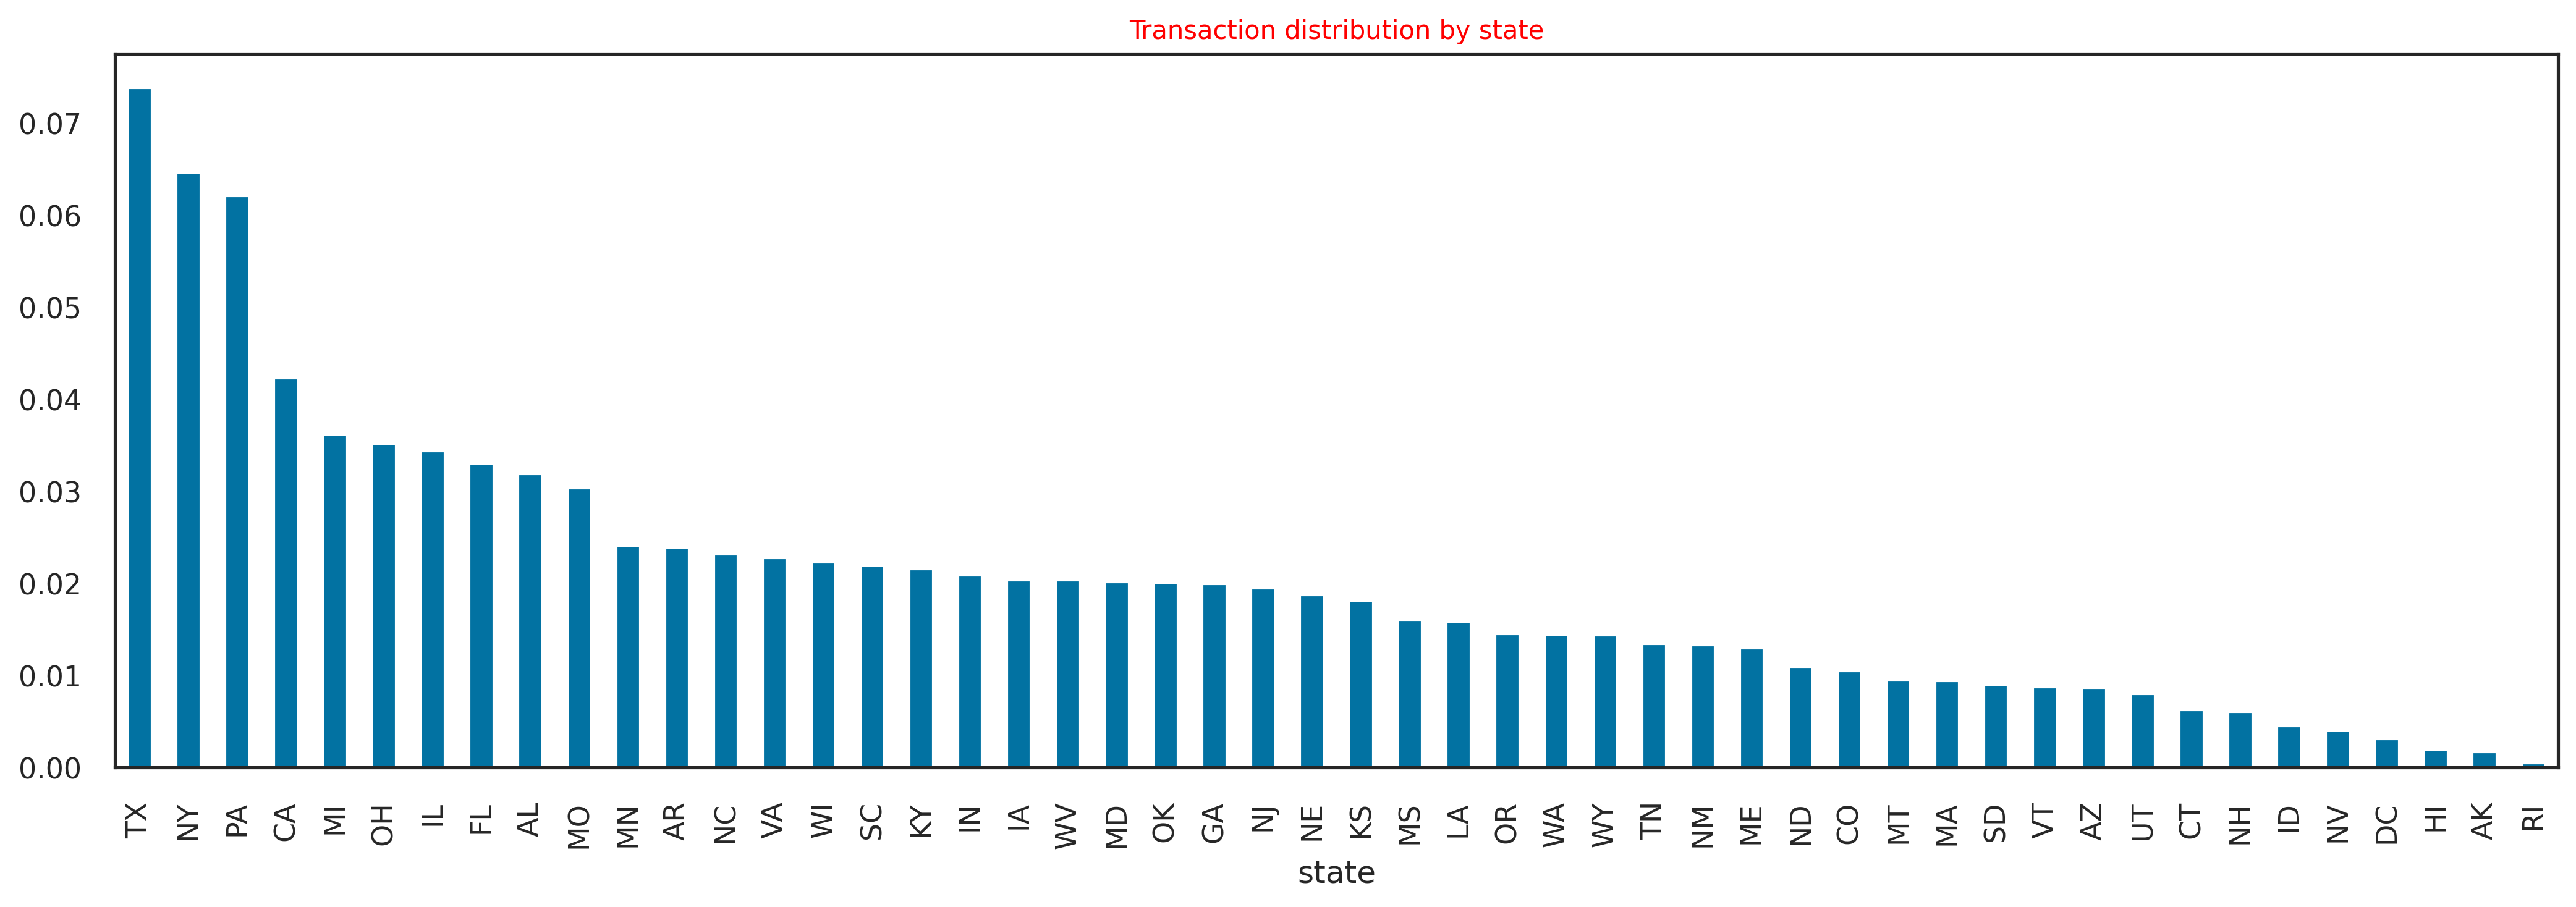

In [ ]:
# Lets check the transaction distribution by Category, Gender and State variables
plt.figure(figsize = (7,5))
plt.title('Transaction distribution by Category', fontsize= 10, color = 'Red', fontweight = 100)
fraud.category.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (7,5))
plt.title('Transaction distribution by gender', fontsize= 10, color = 'Red', fontweight = 100)
fraud.gender.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (17,5))
plt.title('Transaction distribution by state', fontsize= 10, color = 'Red', fontweight = 100)
fraud.state.value_counts(normalize=True).plot.bar()
plt.show()

## Bi-Variate Analysis
Check for the behaviour of various columns against the is_fraud column

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120490 entries, 0 to 120489
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    120490 non-null  object 
 1   category    120490 non-null  object 
 2   amt         120490 non-null  float64
 3   gender      120490 non-null  object 
 4   city        120490 non-null  object 
 5   state       120490 non-null  object 
 6   zip         120490 non-null  int64  
 7   lat         120490 non-null  float64
 8   long        120490 non-null  float64
 9   city_pop    120490 non-null  int64  
 10  job         120490 non-null  object 
 11  unix_time   120489 non-null  float64
 12  merch_lat   120489 non-null  float64
 13  merch_long  120489 non-null  float64
 14  is_fraud    120489 non-null  float64
 15  age         120490 non-null  int64  
 16  trans_date  120490 non-null  object 
 17  trans_time  120490 non-null  object 
dtypes: float64(7), int64(3), object(8)
memory us

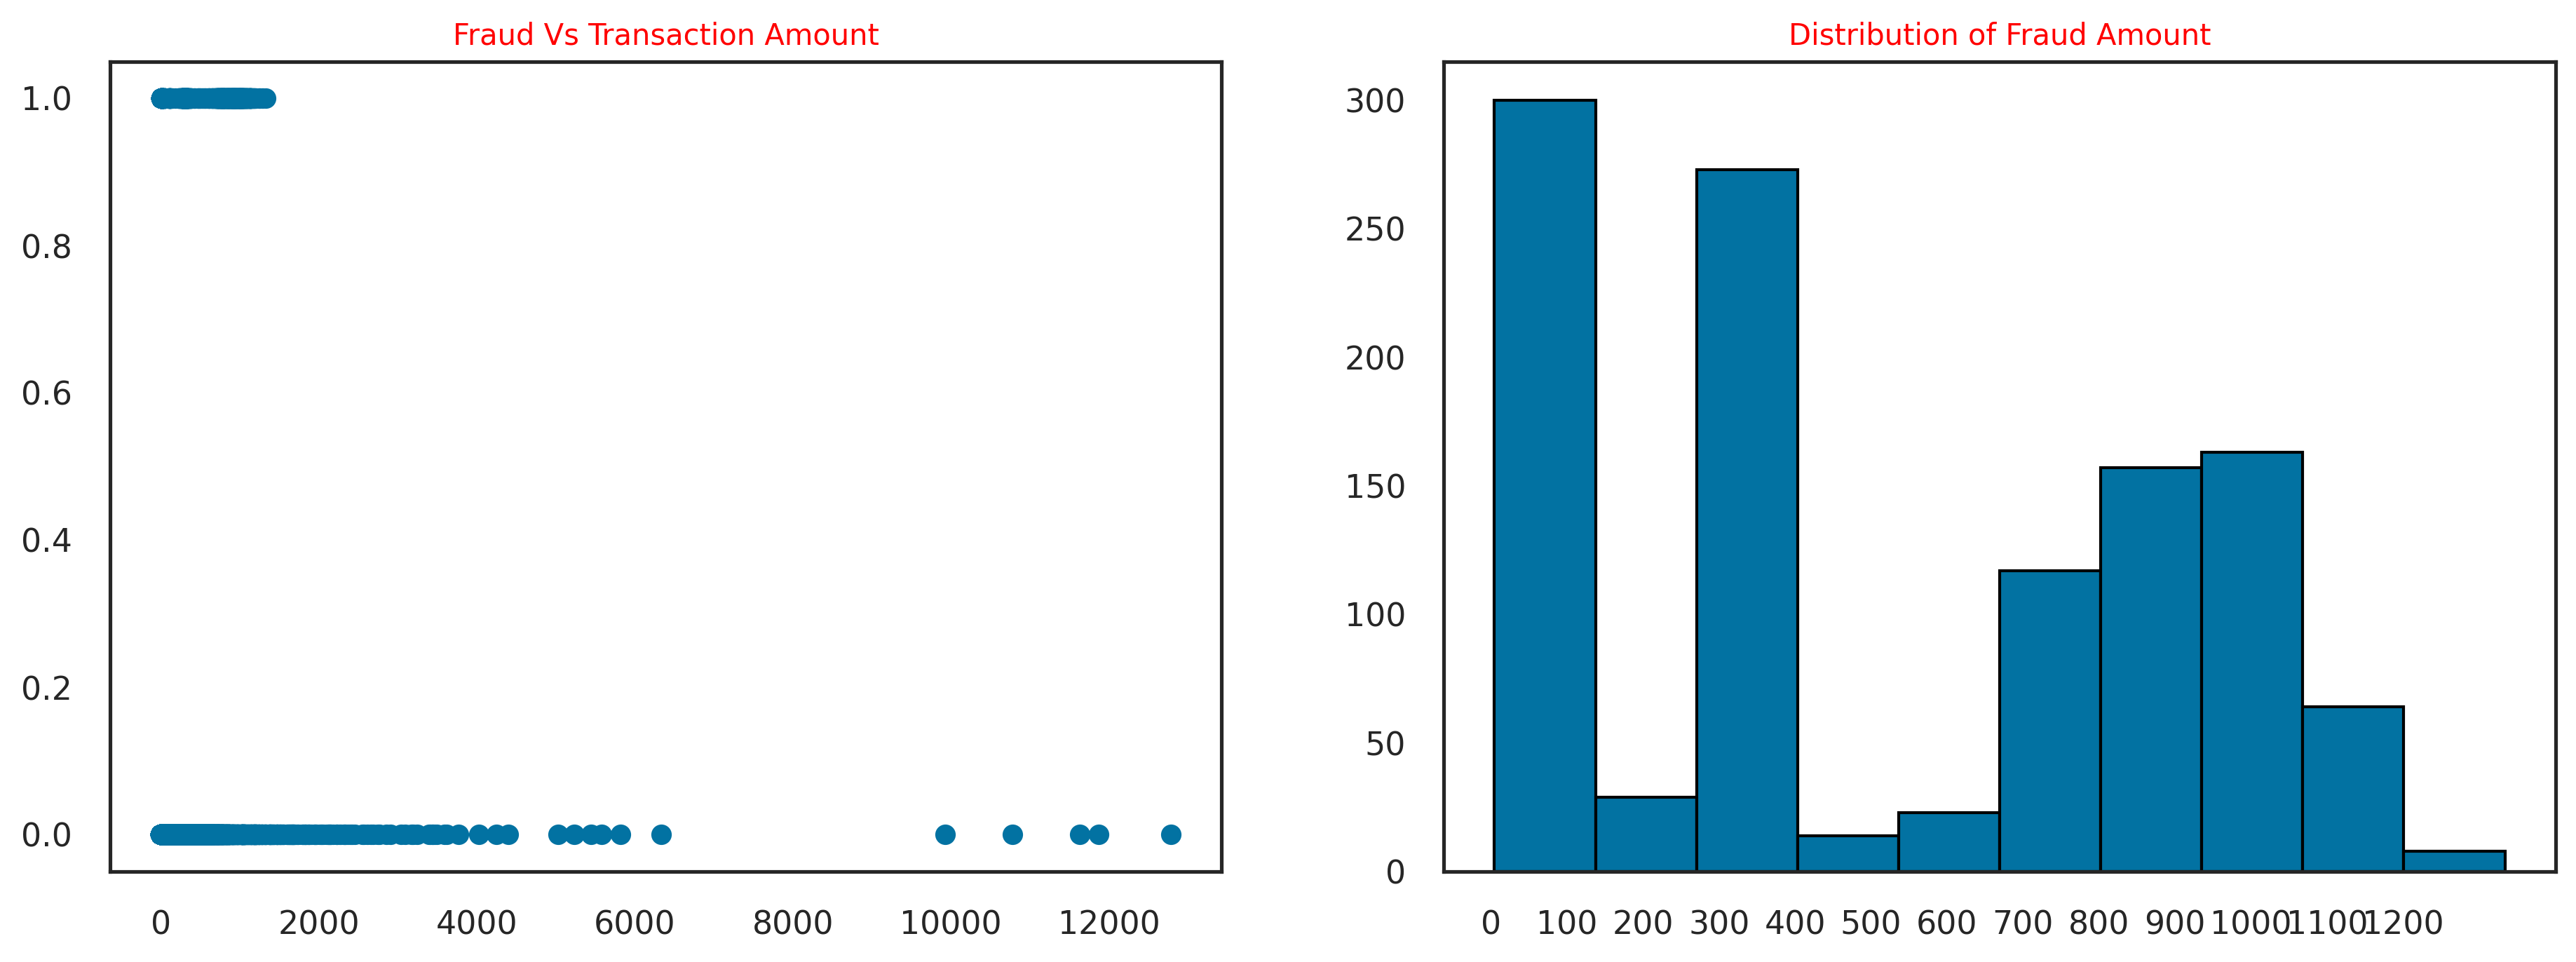

In [ ]:
# Fraud Vs Amount
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Fraud Vs Transaction Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.amt, fraud.is_fraud)
plt.subplot(1,2,2)
#fraud.groupby('is_fraud')['amt'].mean().plot.bar()
#plt.xticks((0,1),['Not Fraud', 'Fraud'])
#plt.xticks(rotation=0)
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Fraud Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.amt, edgecolor='Black')
plt.xticks(np.arange(0, 1300, step=100))

plt.show()

As can be seen from above, frauds are happening in transactions with lower amount hence indicating there is a relation in them.

In [ ]:
# Fraud transactions Vs merchant
# Total number of transactions per merchant
merch_tran_total = fraud.sort_values('merchant').groupby('merchant').count()['is_fraud']
merch_tran_total.head()

merchant
fraud_Abbott-Rogahn                 198
fraud_Abbott-Steuber                160
fraud_Abernathy and Sons            145
fraud_Abshire PLC                   179
fraud_Adams, Kovacek and Kuhlman     80
Name: is_fraud, dtype: int64

In [ ]:
# Total fraud transactions per merchant
merch_tran_fraud = fraud[fraud.is_fraud == 1]['merchant'].value_counts()
merch_tran_fraud.head()

merchant
fraud_Kilback LLC           10
fraud_Gleason-Macejkovic     9
fraud_Kozey-Boehm            9
fraud_Koepp-Parker           9
fraud_Koepp-Witting          9
Name: count, dtype: int64

In [ ]:
# Percent of fraud transactions per merchant
fraud_perc = merch_tran_fraud/ merch_tran_total * 100
fraud_perc.sort_values(ascending=False)

merchant
fraud_Moore, Dibbert and Koepp           4.854369
fraud_Kozey-Boehm                        4.761905
fraud_Tillman, Fritsch and Schmitt       4.629630
fraud_Baumbach, Feeney and Morar         4.624277
fraud_Gleason-Macejkovic                 4.615385
                                           ...   
fraud_Wuckert, Wintheiser and Friesen         NaN
fraud_Zboncak LLC                             NaN
fraud_Zboncak Ltd                             NaN
fraud_Zemlak, Tillman and Cremin              NaN
fraud_Zulauf LLC                              NaN
Length: 693, dtype: float64

Baring a few merchants, most of them have equal distribution of transactions and hence this field may play important role in the model. Changing the alphabetic values to numeric as models expects numeric data.

In [ ]:
# variable transformation - merchant
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fraud.merchant = label_encoder.fit_transform(fraud.merchant)
fraud_test.merchant = label_encoder.fit_transform(fraud_test.merchant)

In [ ]:
# Fraud transactions Vs City
# Percent distribution of fraud based on city
city_tran_total = fraud.sort_values('city').groupby('city').count()['is_fraud']
city_tran_fraud = fraud[fraud.is_fraud == 1]['city'].value_counts()
fraud_perc = city_tran_fraud/ city_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

city
Vacaville    100.0
Waukau       100.0
Greenport    100.0
Gaines       100.0
La Grande    100.0
dtype: float64

As can be seen, few cities have all transactions as fraud. All these cities have low transaction rate. There are 58 such cities.

In [ ]:
# Transforming alphabetic city data into numeric to be processed by the model
fraud.city = label_encoder.fit_transform(fraud.city)
fraud_test.city = label_encoder.fit_transform(fraud_test.city)

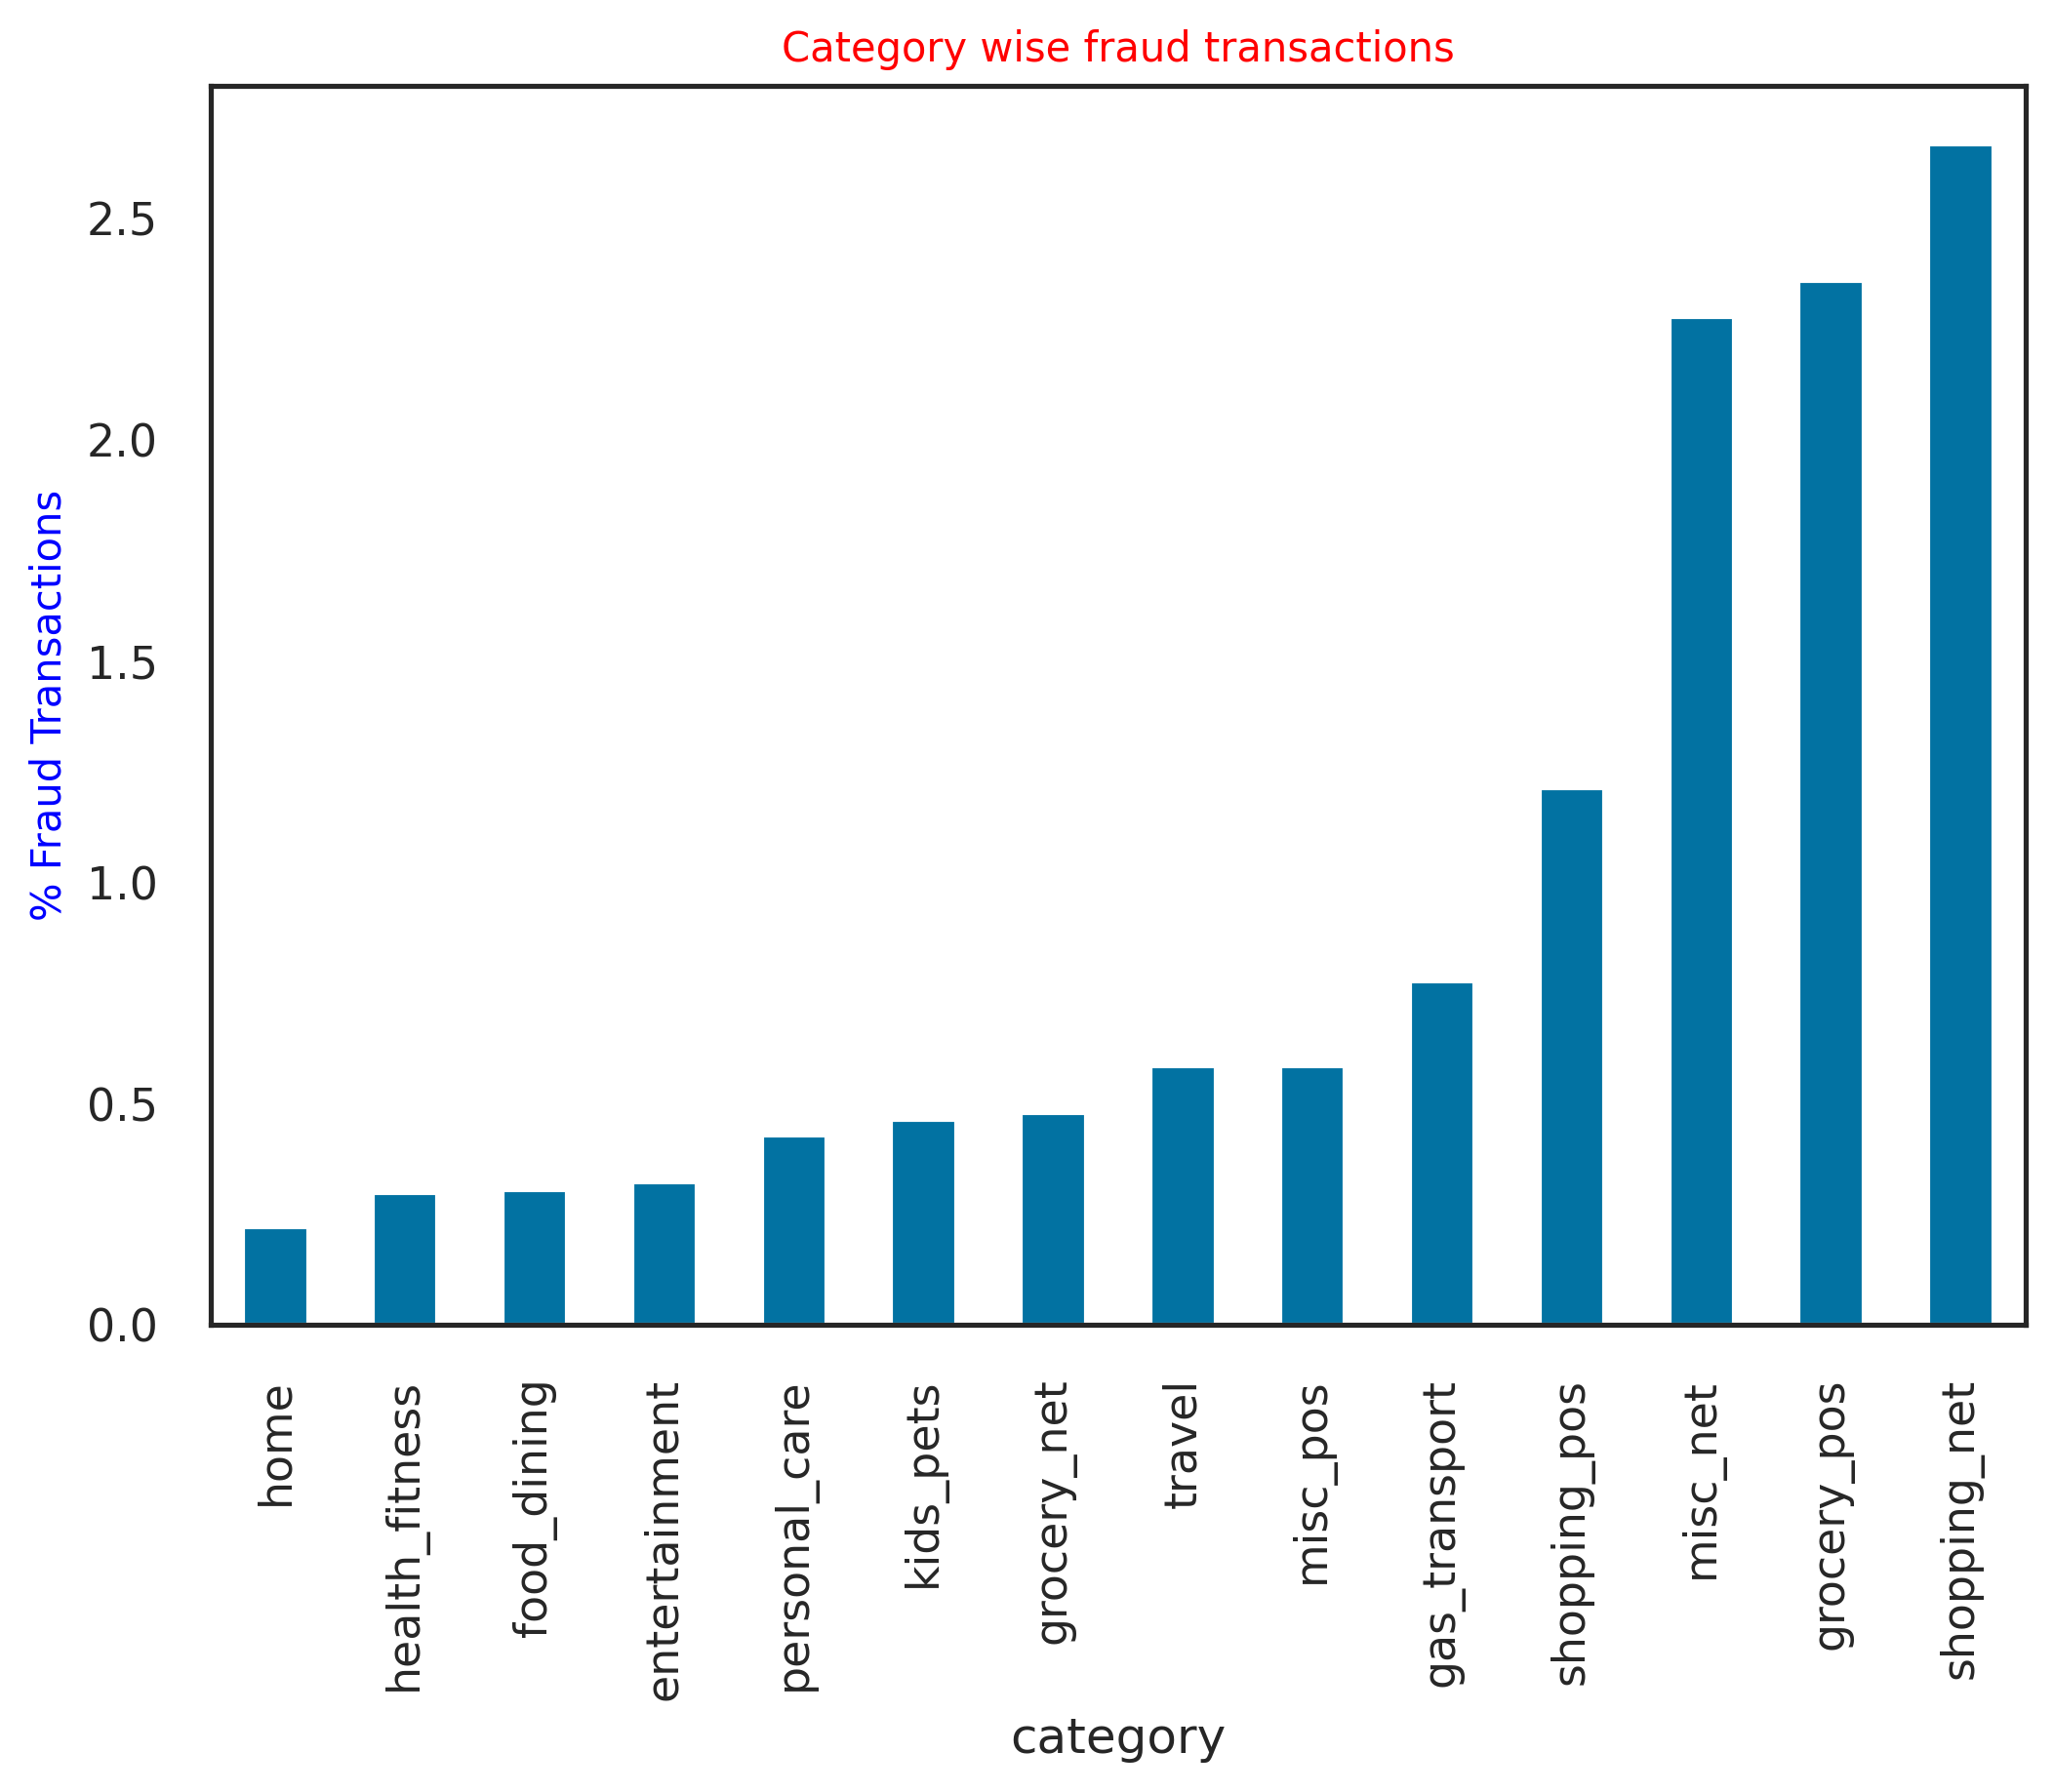

In [ ]:
# category Vs fraud
# Percent distribution of fraud based on transaction category
cat_tran_total = fraud.sort_values('category').groupby('category').count()['is_fraud']
cat_tran_fraud = fraud[fraud.is_fraud == 1]['category'].value_counts()
fraud_perc = cat_tran_fraud/ cat_tran_total * 100
plt.title('Category wise fraud transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values().plot.bar()
plt.show()

In [ ]:
# Transforming alphabetic category data into numeric to be processed by the model
fraud.category = label_encoder.fit_transform(fraud.category)
fraud_test.category = label_encoder.fit_transform(fraud_test.category)

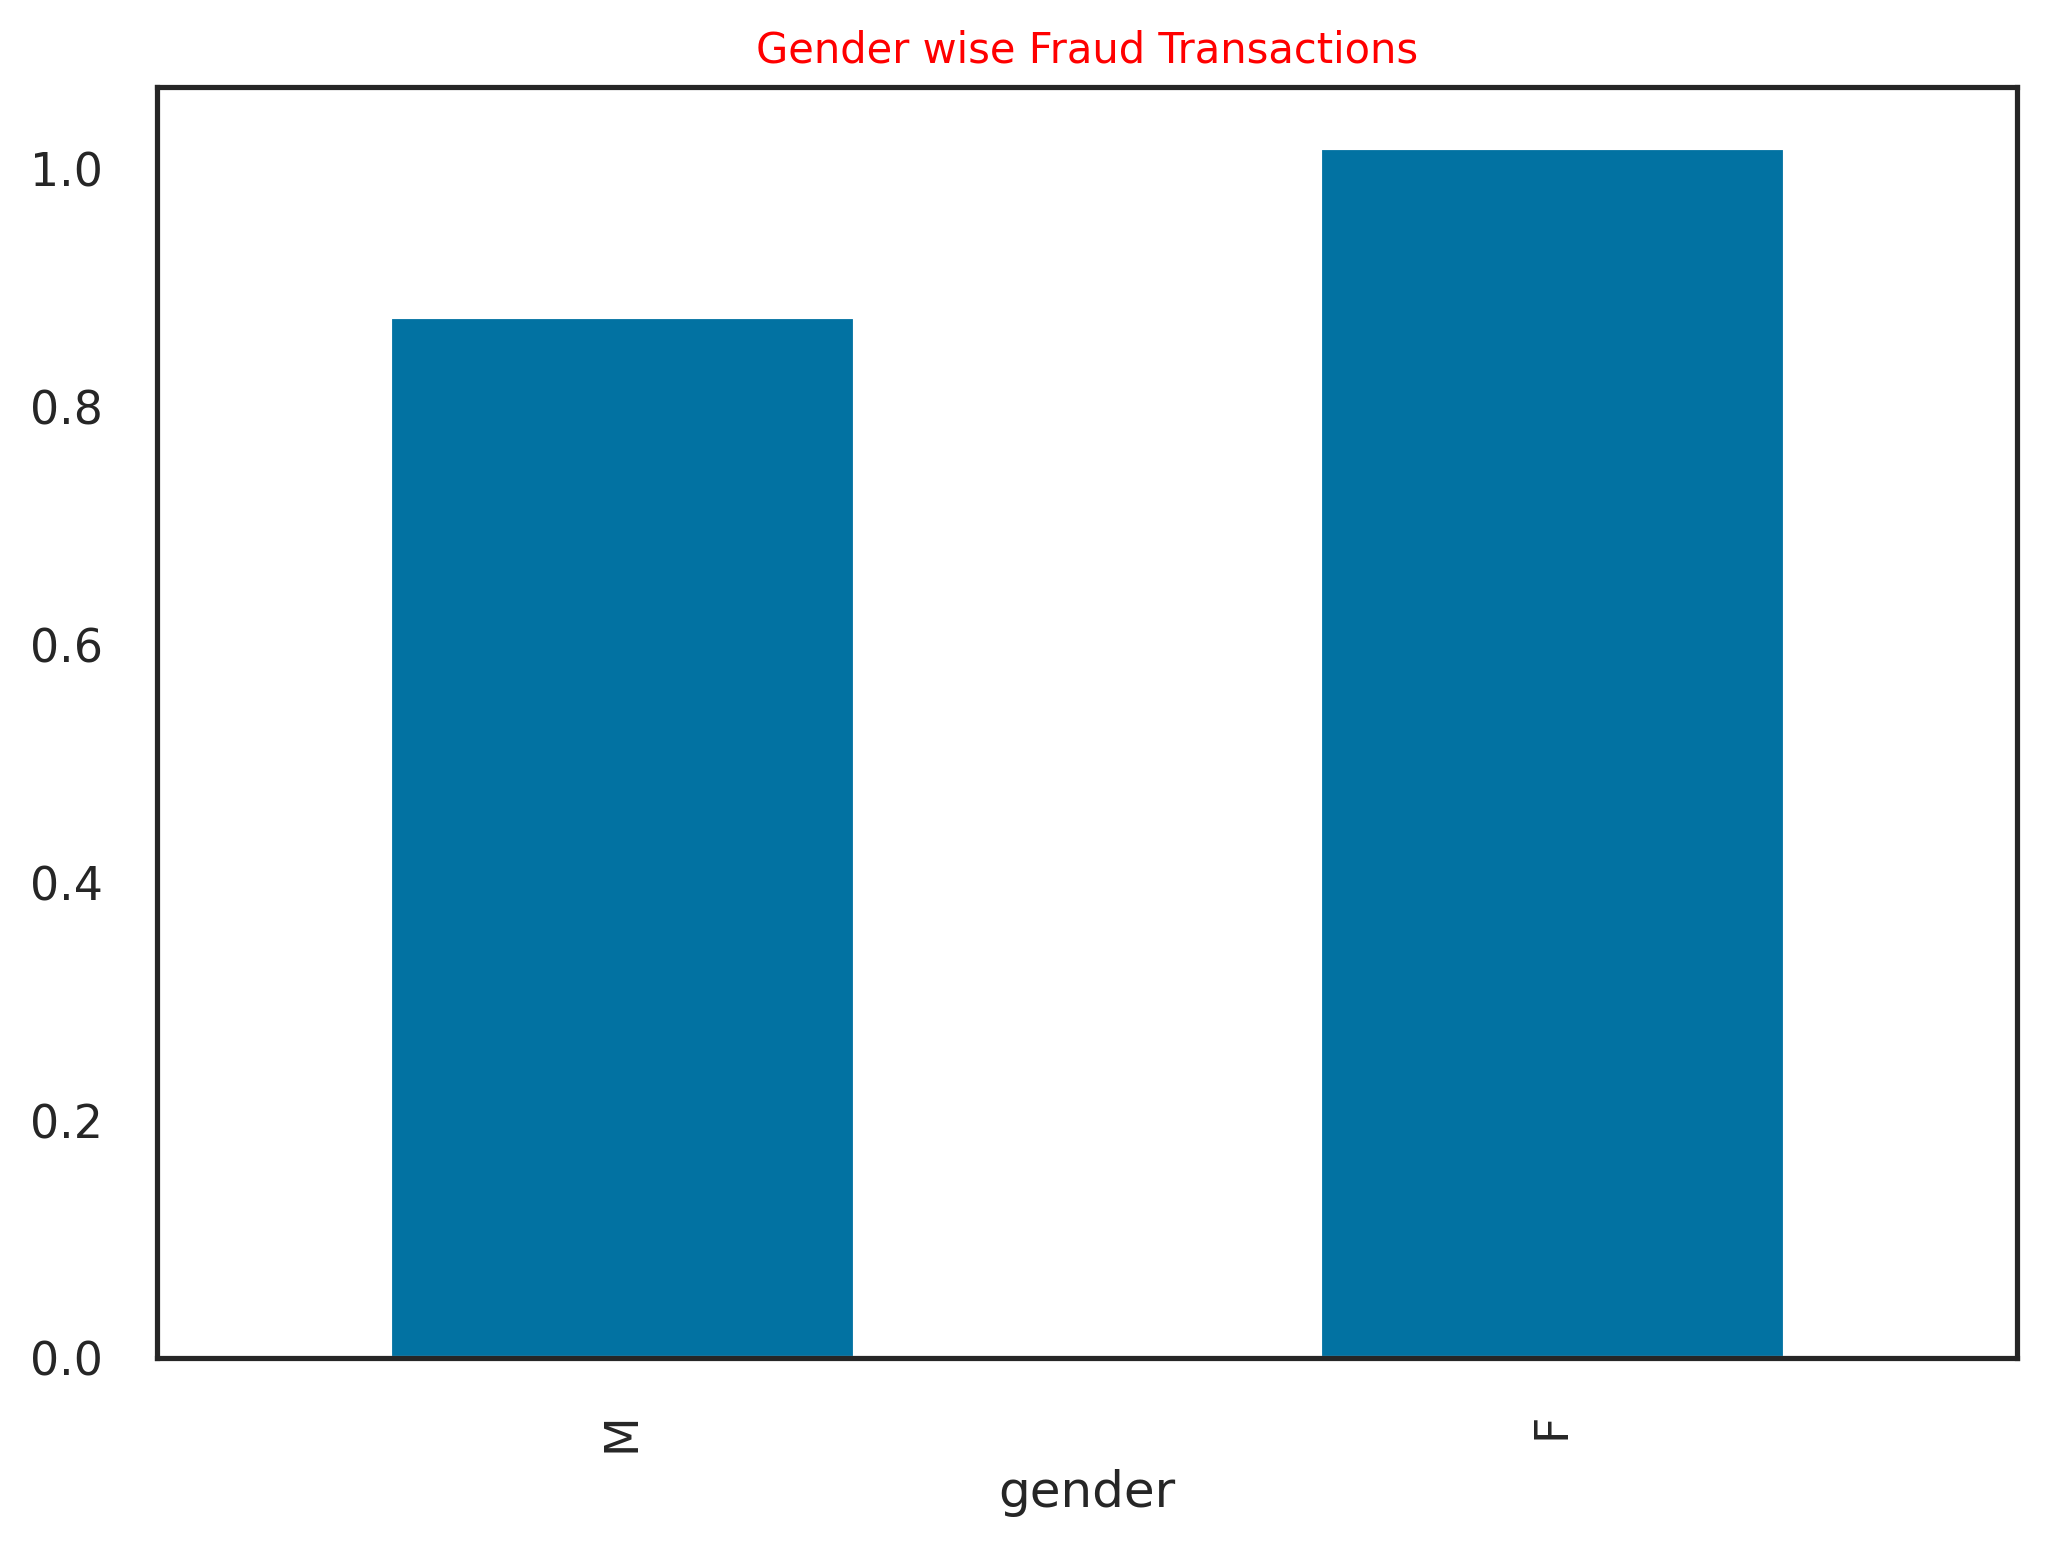

In [ ]:
# Gender Vs Fraud
# Percent distribution of fraud based on Gender
gen_tran_total = fraud.sort_values('gender').groupby('gender').count()['is_fraud']
gen_tran_fraud = fraud[fraud.is_fraud == 1]['gender'].value_counts()
fraud_perc = gen_tran_fraud/ gen_tran_total * 100
plt.title('Gender wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
fraud_perc.sort_values().plot.bar()
plt.show()

In [ ]:
# Transforming alphabetic gender data into numeric to be processed by the model
fraud.gender = fraud.gender.map({'M': 1, "F": 0})
fraud_test.gender = fraud_test.gender.map({'M': 1, "F": 0})

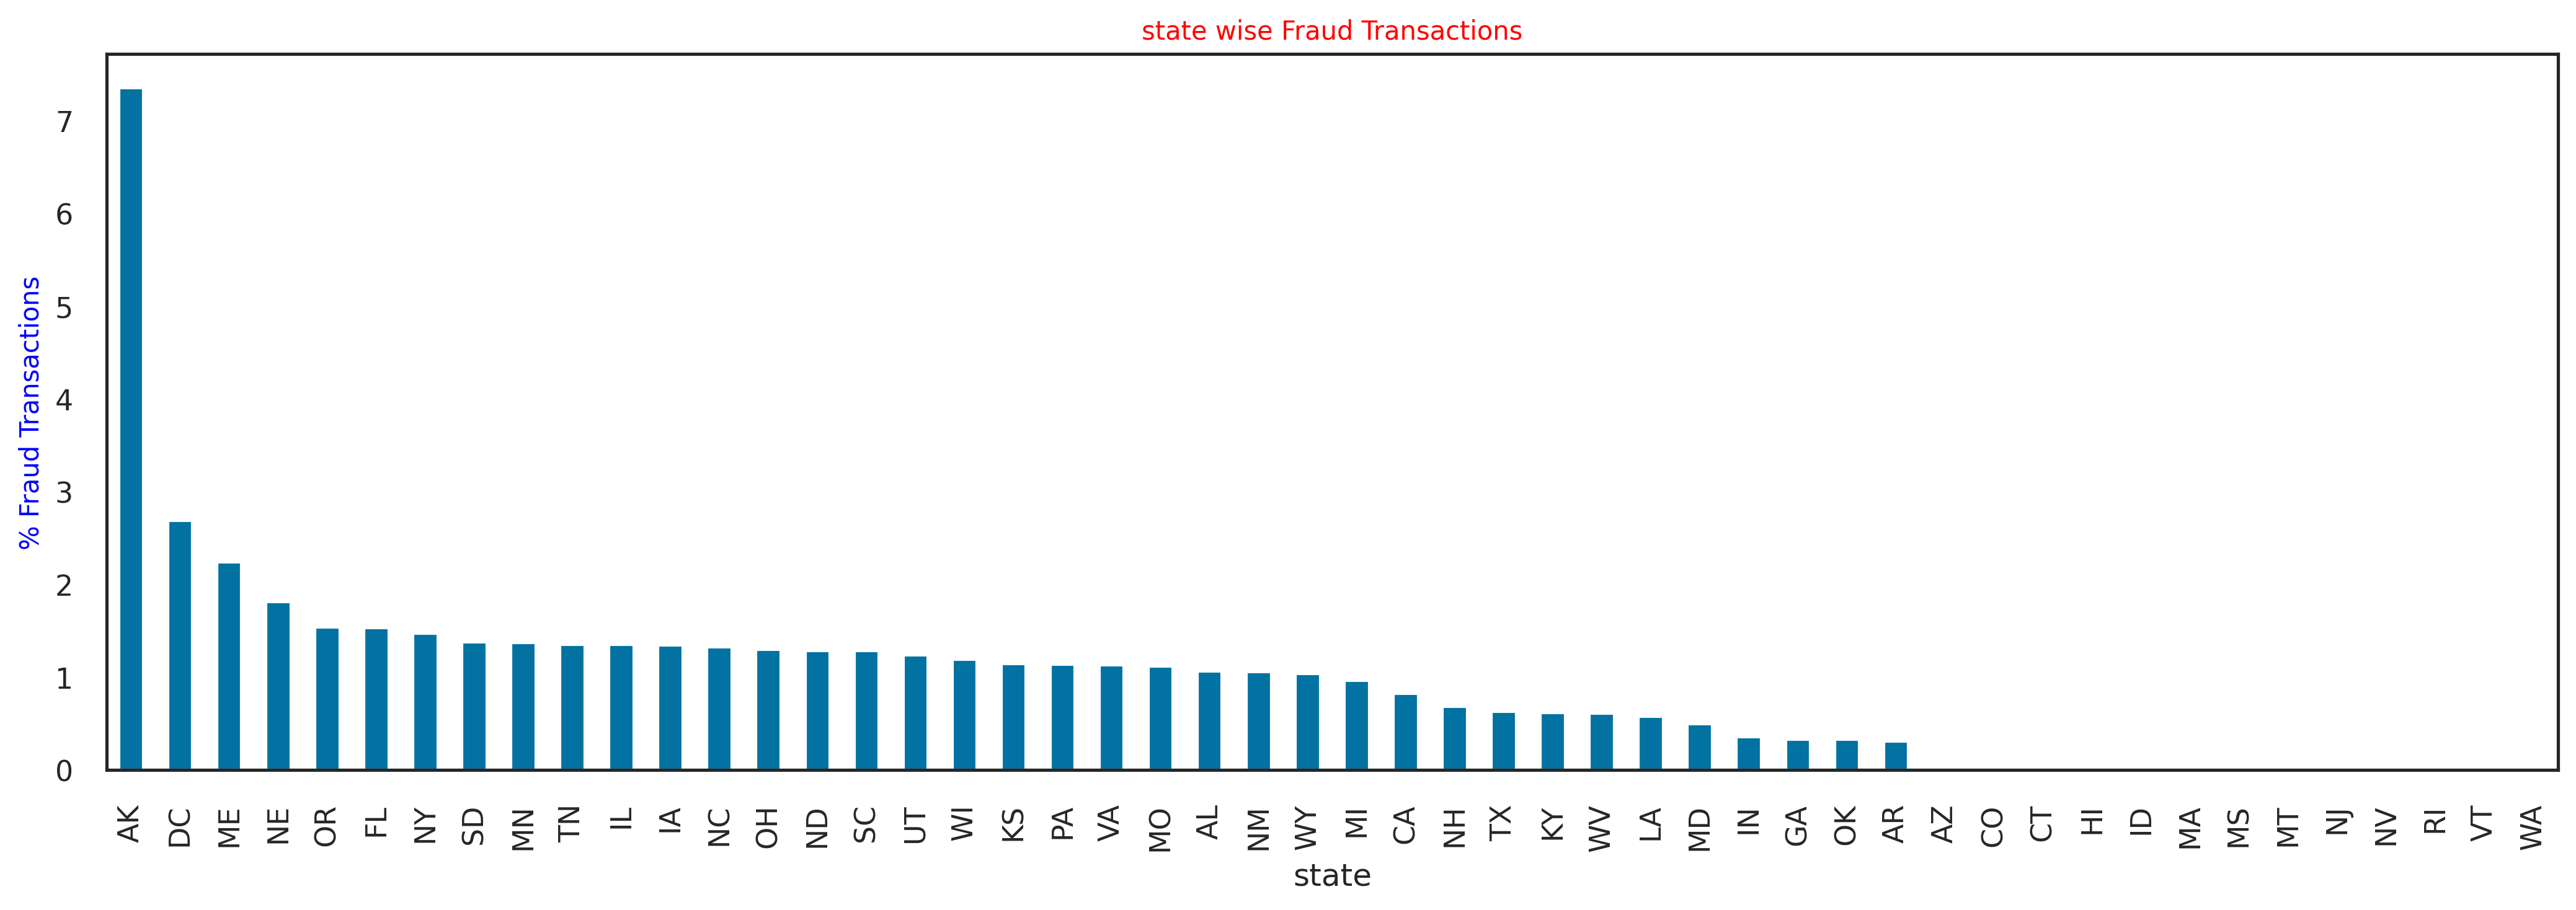

In [ ]:
# state Vs fraud
# Percent distribution of fraud based on State
plt.figure(figsize = (17,5))
state_tran_total = fraud.sort_values('state').groupby('state').count()['is_fraud']
state_tran_fraud = fraud[fraud.is_fraud == 1]['state'].value_counts()
fraud_perc = state_tran_fraud/ state_tran_total * 100
plt.title('state wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values(ascending=False).plot.bar()
plt.show()

In [ ]:
fraud_perc.sort_values(ascending=False).head()

state
AK    7.352941
DC    2.688172
ME    2.242152
NE    1.812555
OR    1.540217
dtype: float64

This is very significant. While the number of transactions in DE is very less, all of them are fraud transaction. Rest all the states have very low fraud transaction.

In [ ]:
# Transforming alphabetic state data into numeric to be processed by the model
fraud.state = label_encoder.fit_transform(fraud.state)
fraud_test.state = label_encoder.fit_transform(fraud_test.state)

In [ ]:
# Job Vs Fraud
# Percent distribution of fraud based on Job
job_tran_total = fraud.sort_values('job').groupby('job').count()['is_fraud']
job_tran_fraud = fraud[fraud.is_fraud == 1]['job'].value_counts()
fraud_perc = job_tran_fraud/ job_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

job
Engineer, site                           100.000000
Veterinary surgeon                       100.000000
Armed forces technical officer           100.000000
Contracting civil engineer               100.000000
Geneticist, molecular                     23.880597
Magazine journalist                       22.950820
Solicitor, Scotland                       22.448980
Marketing executive                       19.607843
Charity officer                           18.461538
Clinical cytogeneticist                   14.583333
Restaurant manager, fast food             14.062500
Community development worker              13.725490
Oncologist                                13.114754
Economist                                 13.043478
English as a foreign language teacher     13.043478
Set designer                              12.582781
Presenter, broadcasting                   11.000000
Special effects artist                     9.740260
Chief of Staff                             9.734513
Horticultural consultant                   9.722222
dtype: float64

There seems certain jobs that have real high % of fraud transactions.

In [ ]:
# Transforming alphabetic job data into numeric to be processed by the model
fraud.job = label_encoder.fit_transform(fraud.job)
fraud_test.job = label_encoder.fit_transform(fraud_test.job)

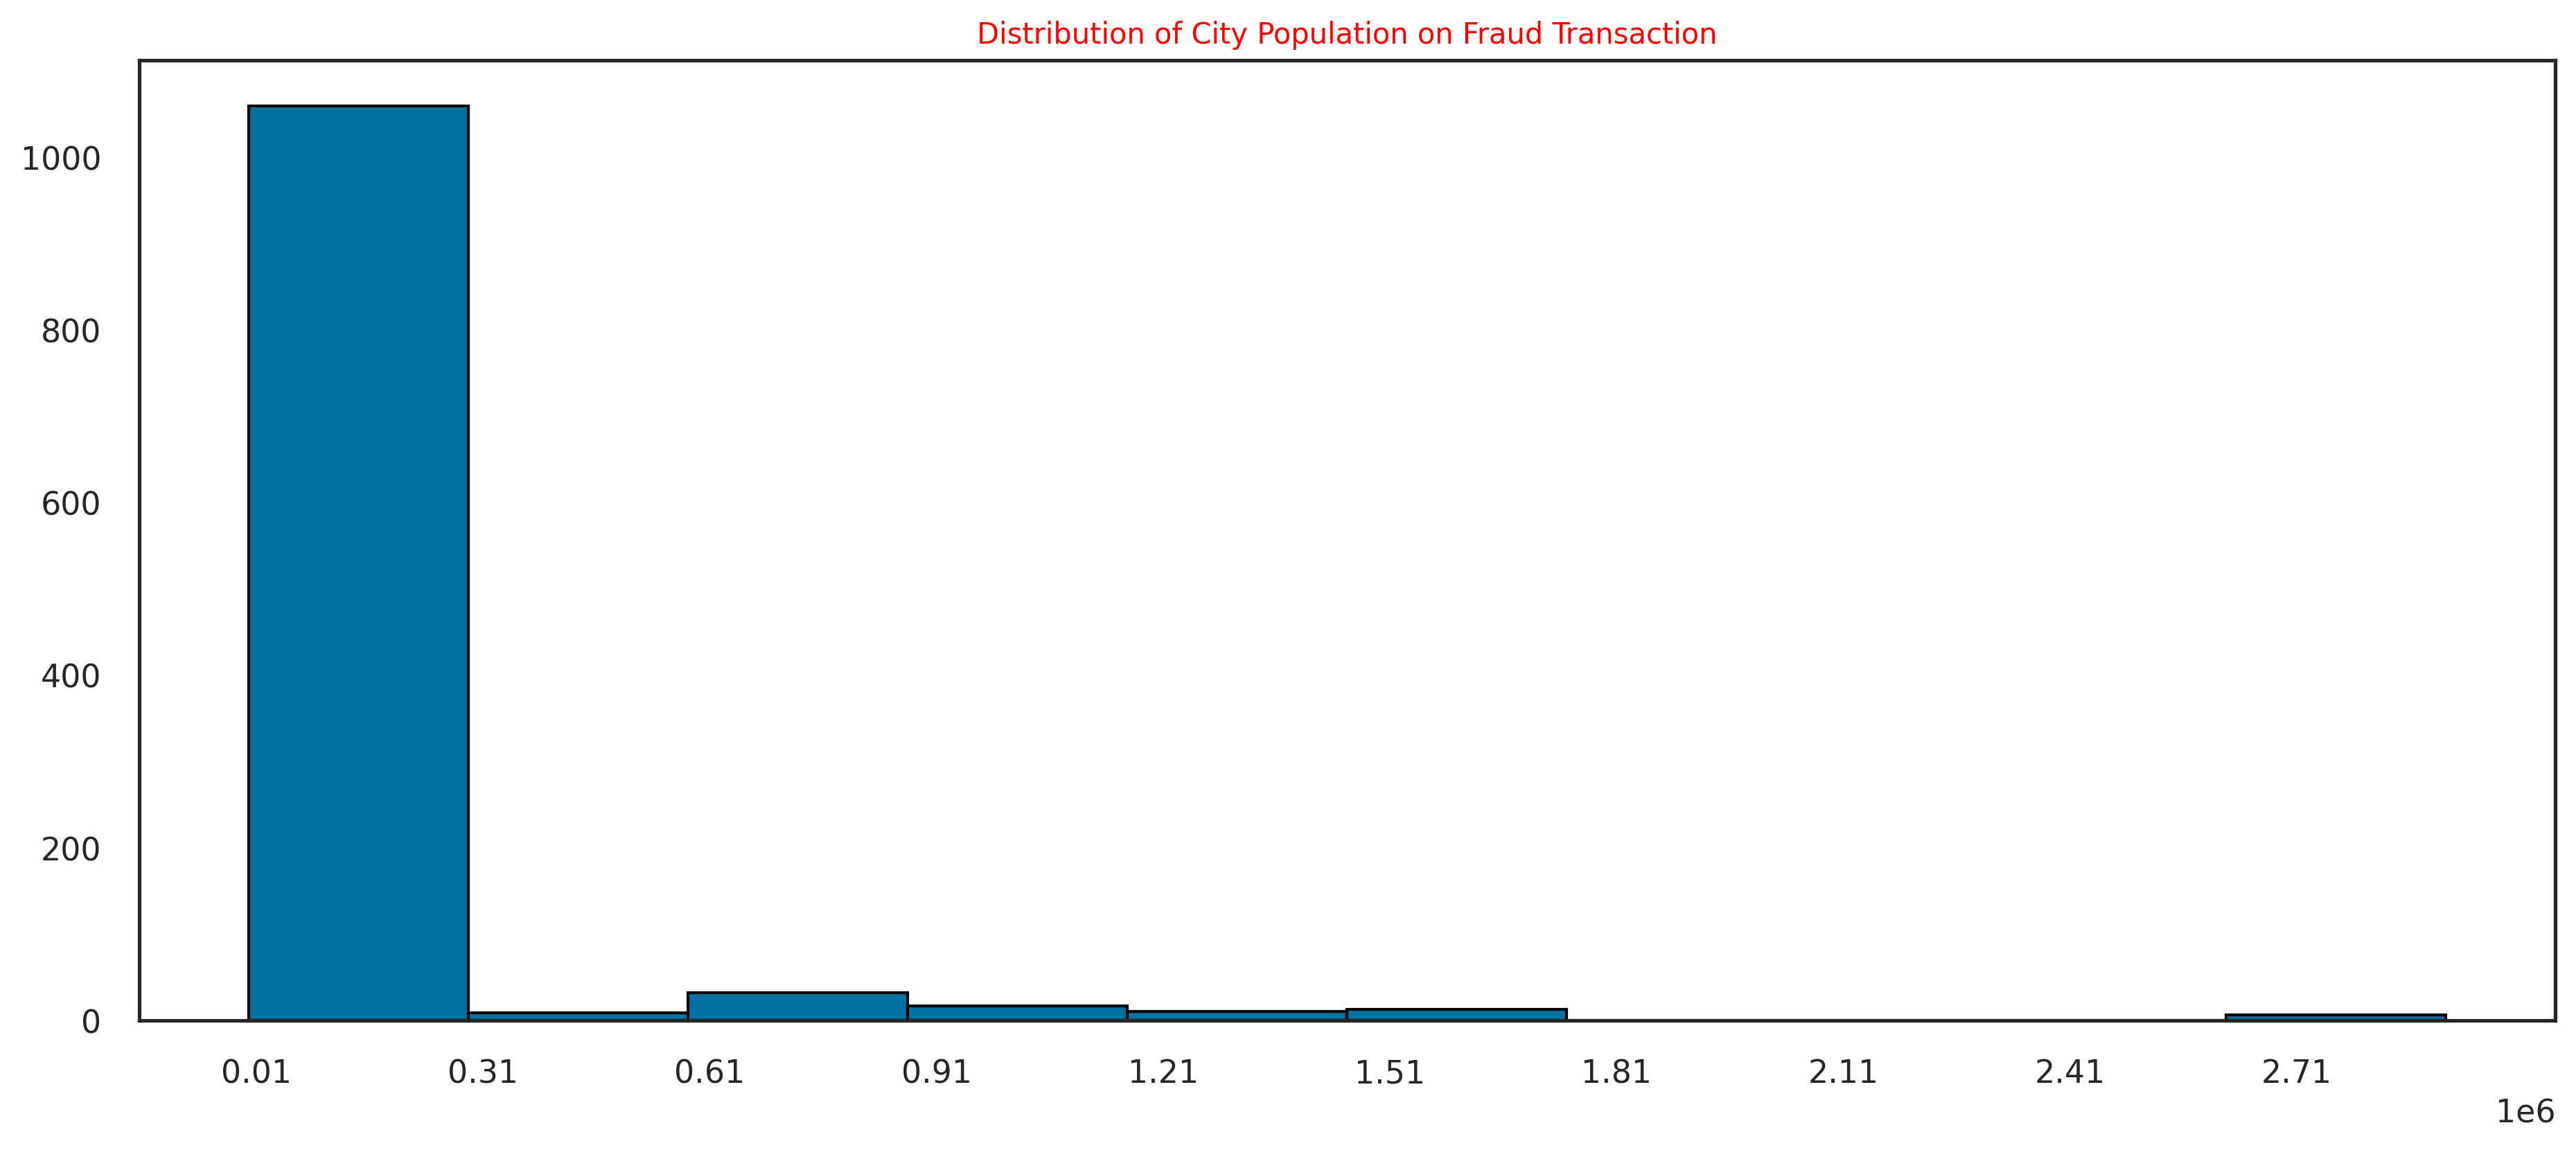

In [ ]:
# Fraud Vs City Population
plt.figure(figsize=[15,6])
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of City Population on Fraud Transaction', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.city_pop, edgecolor='Black')
plt.xticks(np.arange(10000, 3000000, step=300000))
plt.show()

Cities with less population, tends to have more fraud cases.

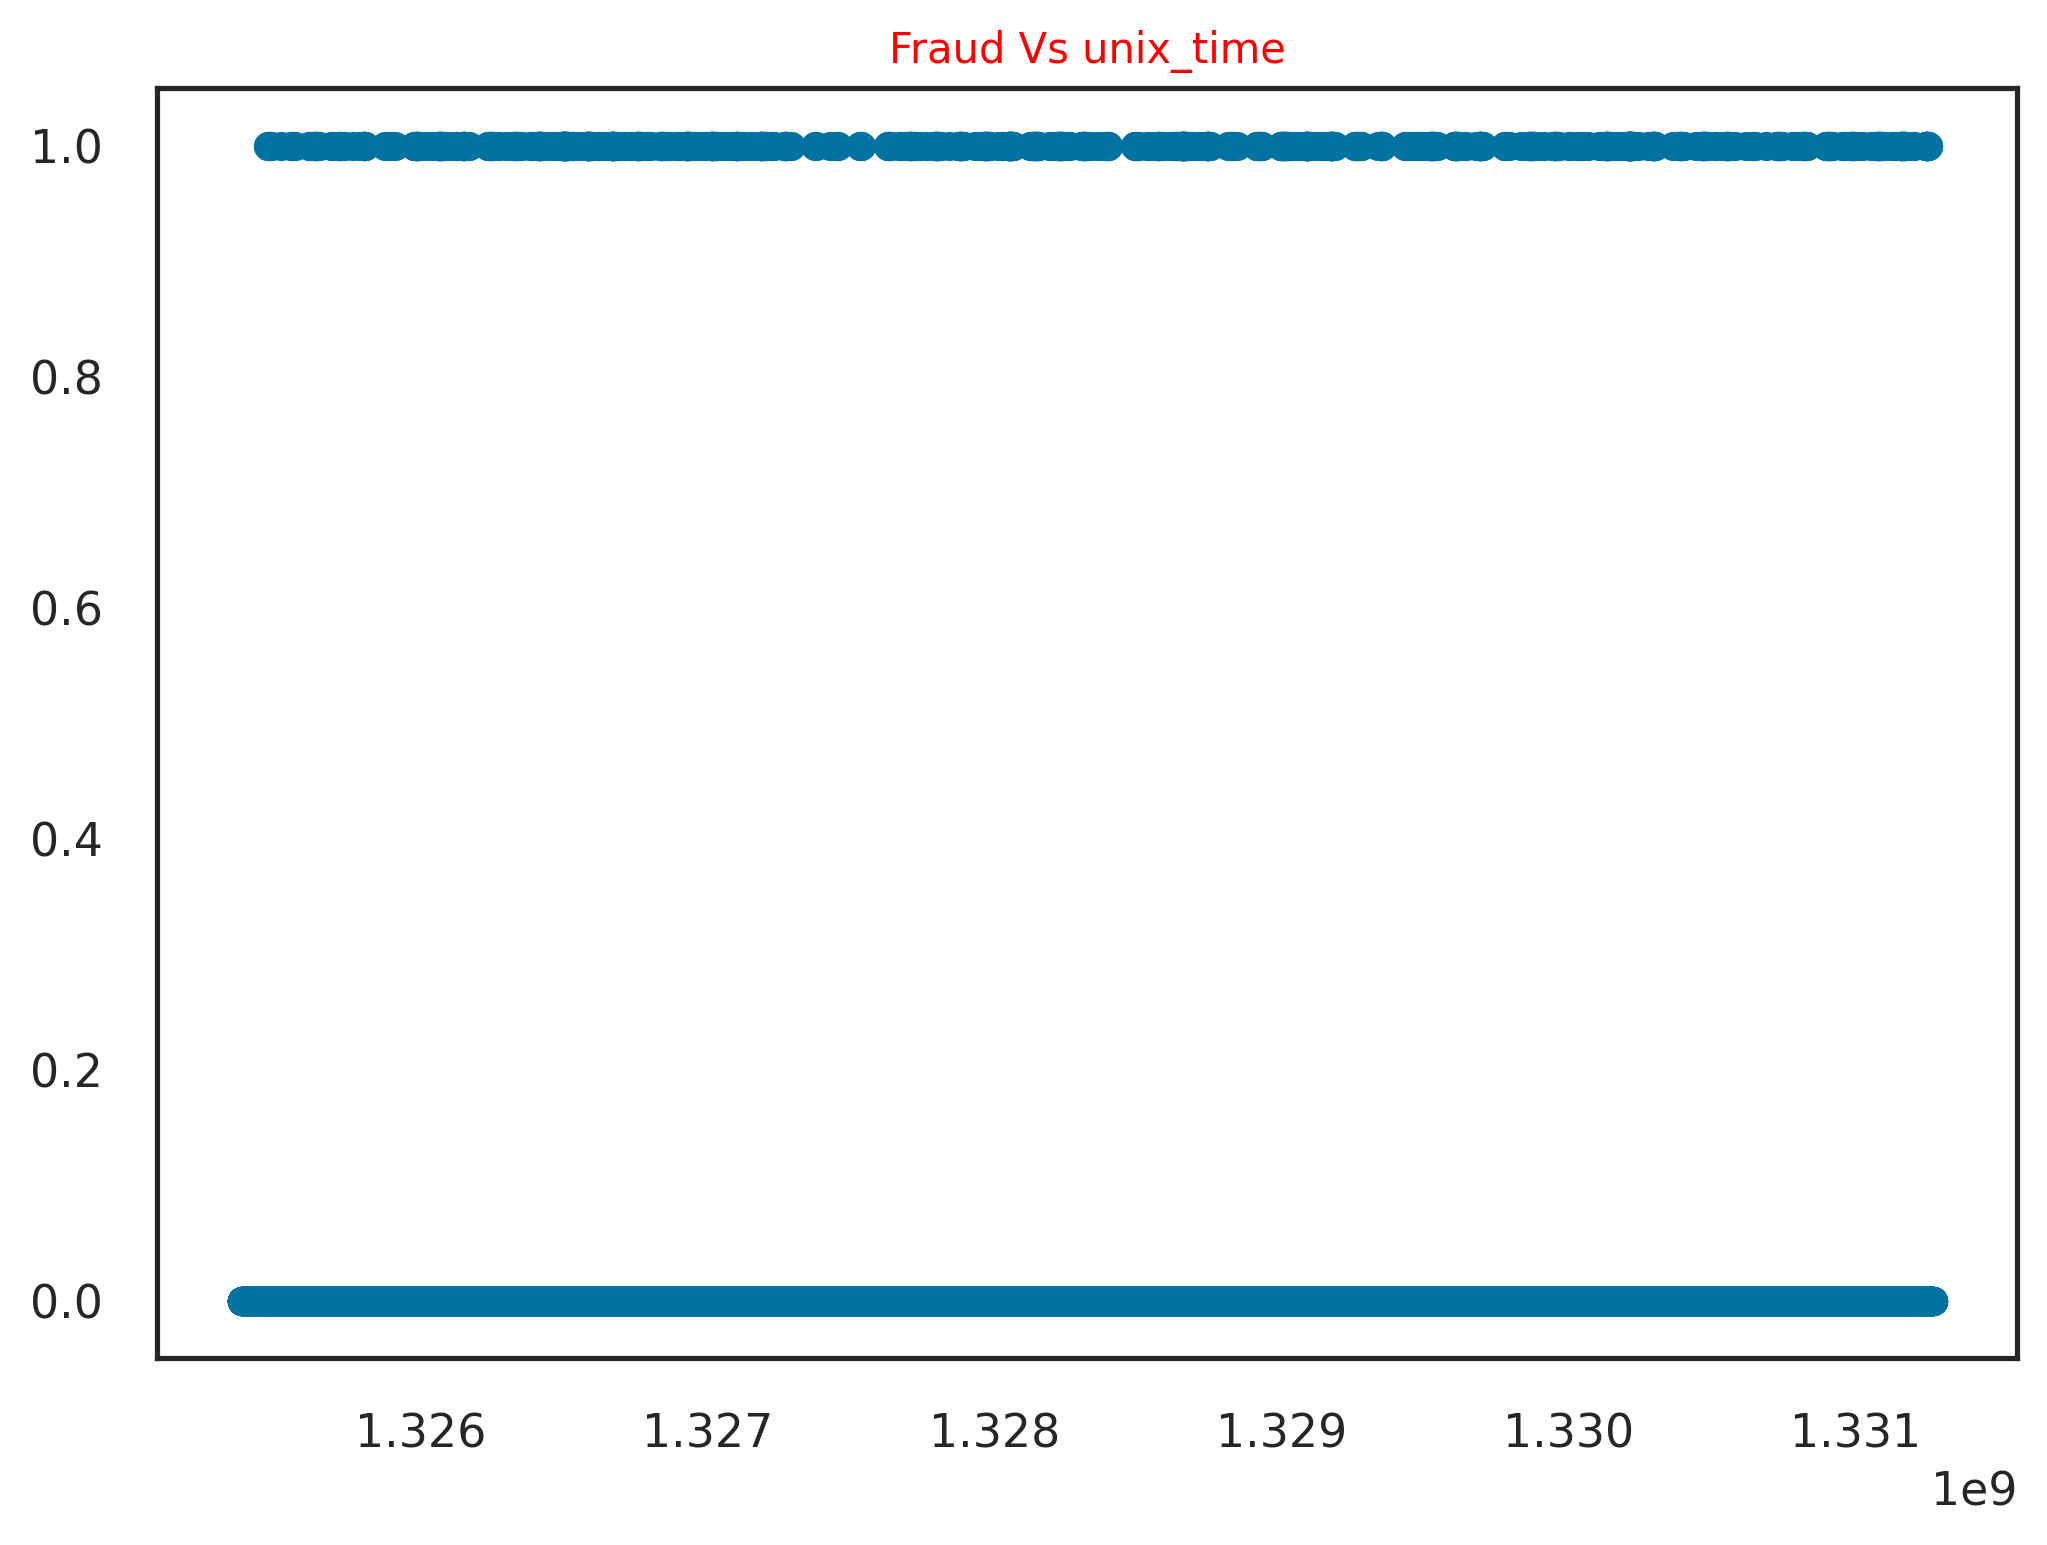

In [ ]:
# Fraud Vs Unix Time
plt.title('Fraud Vs unix_time', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.unix_time, fraud.is_fraud)
plt.show()

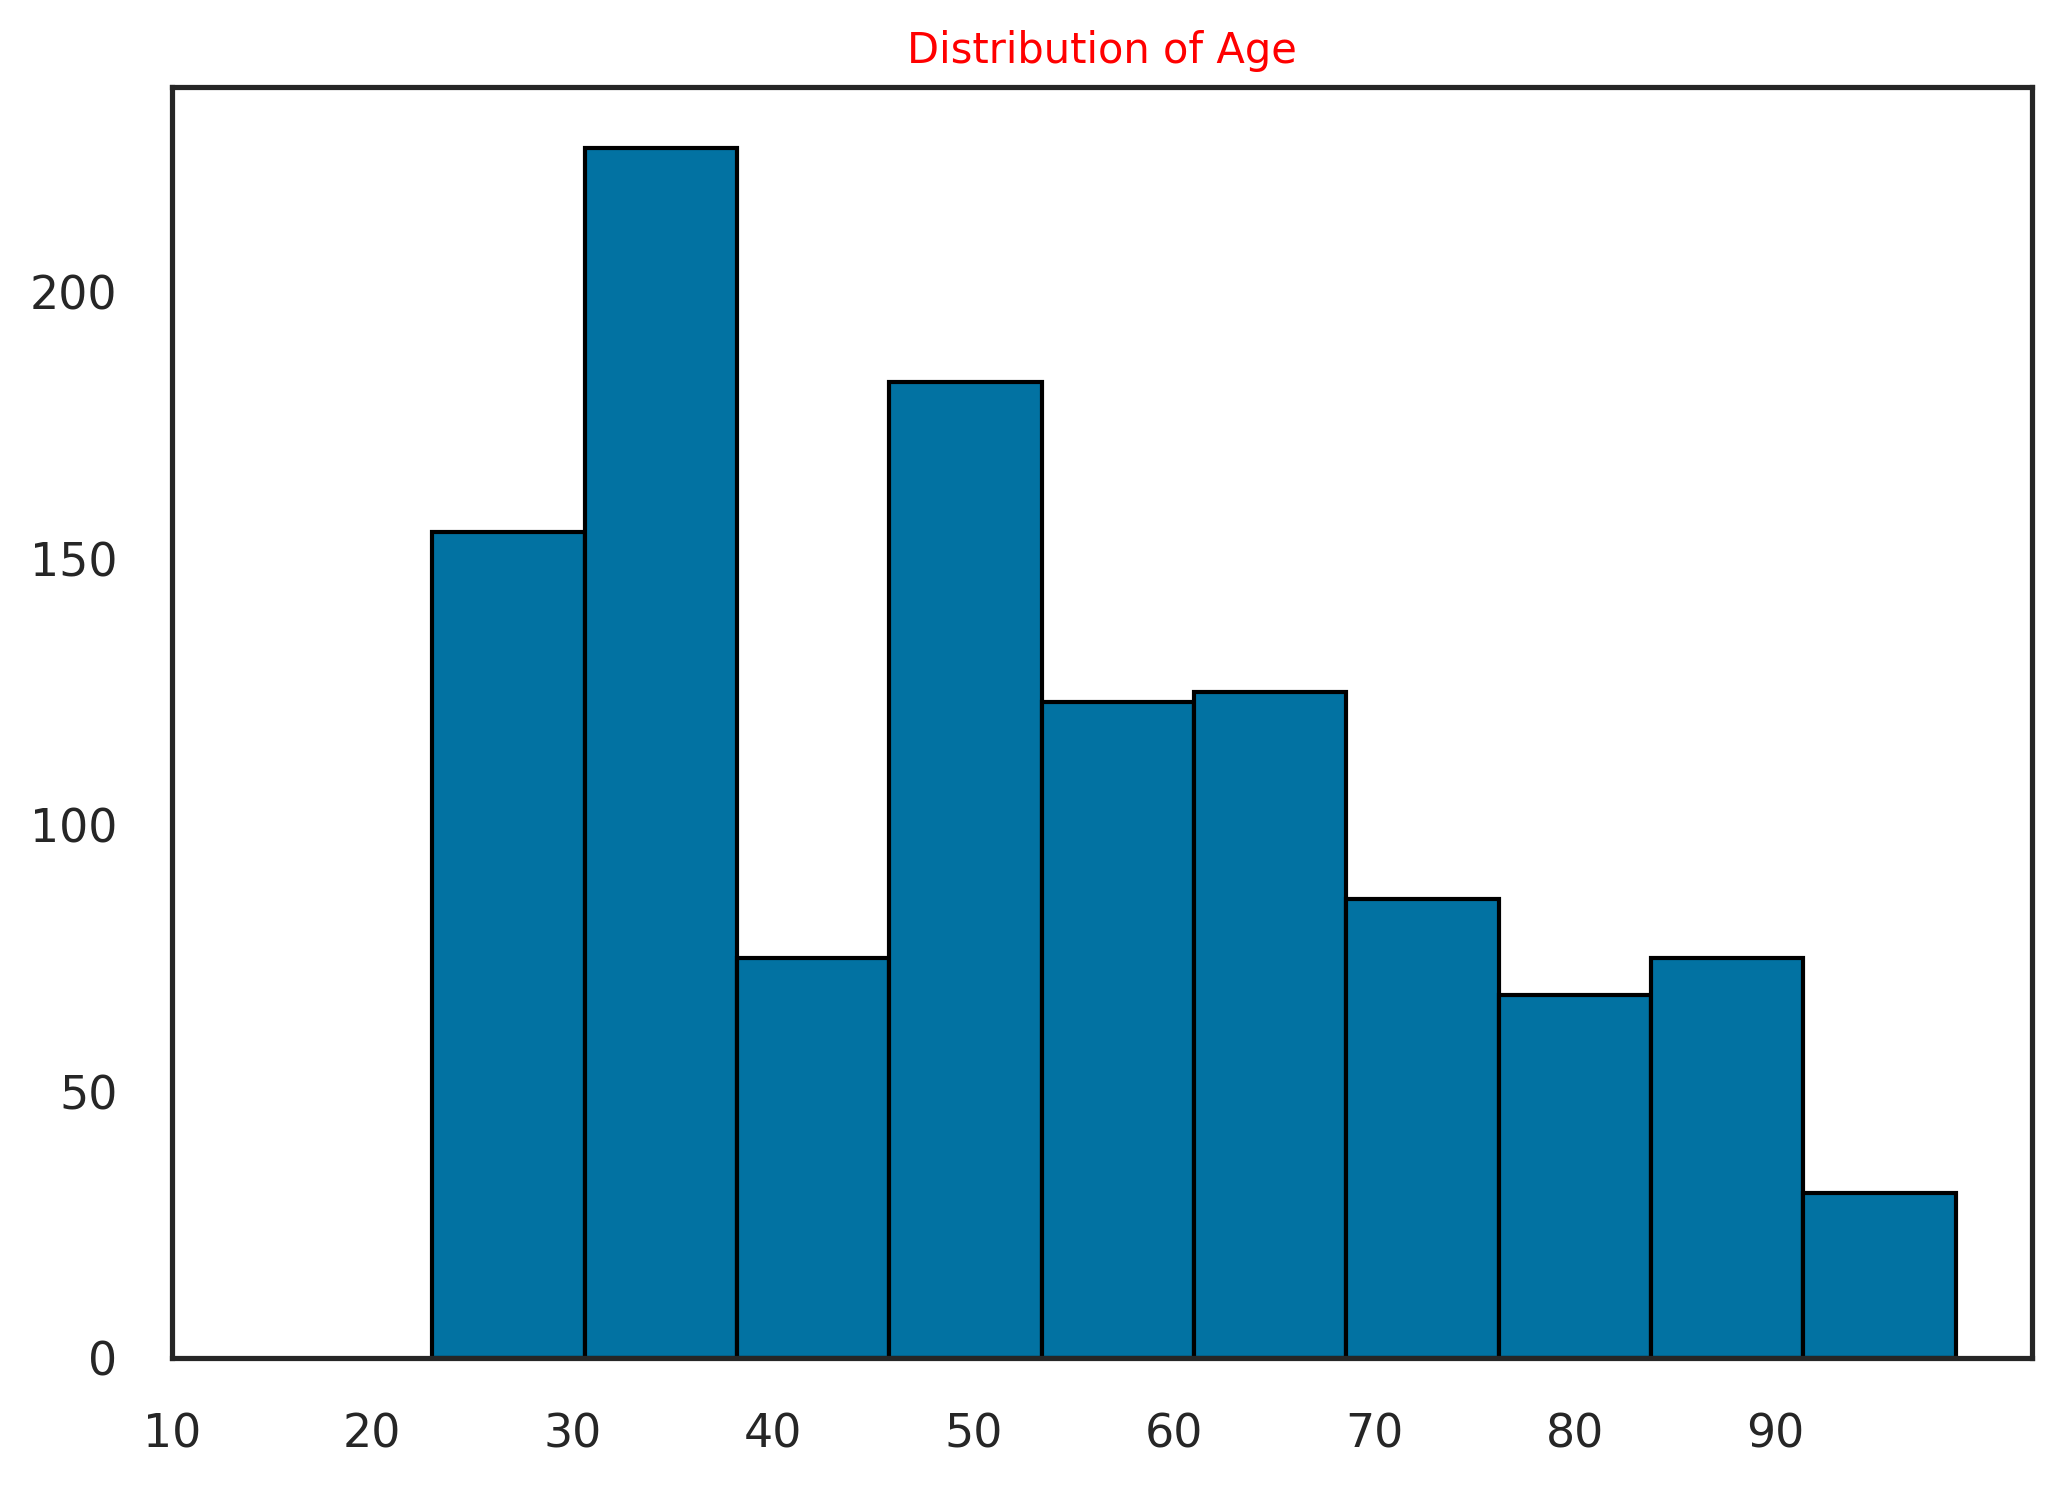

In [ ]:
# Fraud Vs Age
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

So, people in age group 50 to 60 tends to be slightly more victims of fraud.

In [ ]:
# Fraud Vs Zip
zip_tran_total = fraud.sort_values('zip').groupby('zip').count()['is_fraud']
zip_tran_fraud = fraud[fraud.is_fraud == 1]['zip'].value_counts()
fraud_perc = zip_tran_fraud/ zip_tran_total * 100
fraud_perc.sort_values(ascending=False).head(25)

zip
37411    100.000000
54980    100.000000
28033    100.000000
70447    100.000000
68375    100.000000
62896    100.000000
77027    100.000000
78208    100.000000
14532    100.000000
48436    100.000000
95688    100.000000
97850    100.000000
10553    100.000000
11944    100.000000
56117     25.000000
45638     24.074074
33760     23.880597
62266     22.950820
68869     22.448980
23106     20.370370
34120     20.370370
92267     19.607843
92101     18.965517
55606     18.627451
87116     18.461538
dtype: float64

As is evident from above stats, there are perticular ZIP codes that have 100% frauds.

In [ ]:
# Fraud Vs lat
lat_tran_total = fraud.sort_values('lat').groupby('lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

lat
42.9582    100.0
35.0271    100.0
41.1039    100.0
45.3304    100.0
29.4400    100.0
dtype: float64

As is evident from above stats, there are perticular latitudes codes that have 100% frauds.

In [ ]:
# Fraud Vs long
long_tran_total = fraud.sort_values('long').groupby('long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

long
-81.3385    100.0
-77.0473    100.0
-90.1773    100.0
-85.2356    100.0
-83.8855    100.0
dtype: float64

In [ ]:
# Fraud Vs merch_lat
lat_tran_total = fraud.sort_values('merch_lat').groupby('merch_lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['merch_lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

merch_lat
25.568094    100.0
41.423442    100.0
41.455073    100.0
41.449762    100.0
41.443711    100.0
dtype: float64

In [ ]:
# Fraud Vs merch_long
long_tran_total = fraud.sort_values('merch_long').groupby('merch_long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['merch_long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

merch_long
-166.550779    100.0
-81.383306     100.0
-81.278516     100.0
-81.300327     100.0
-81.305820     100.0
dtype: float64

1. There are multiple demographies - Zip, City, States, Latitudes, Longitudes and Job types that have only Fraud transactions.
2. Even though they have 100% frauds, the number of transactions is very low. For Example State DE had only 9 transactions in 2 years. Hence, it is very less likely to impact the model.

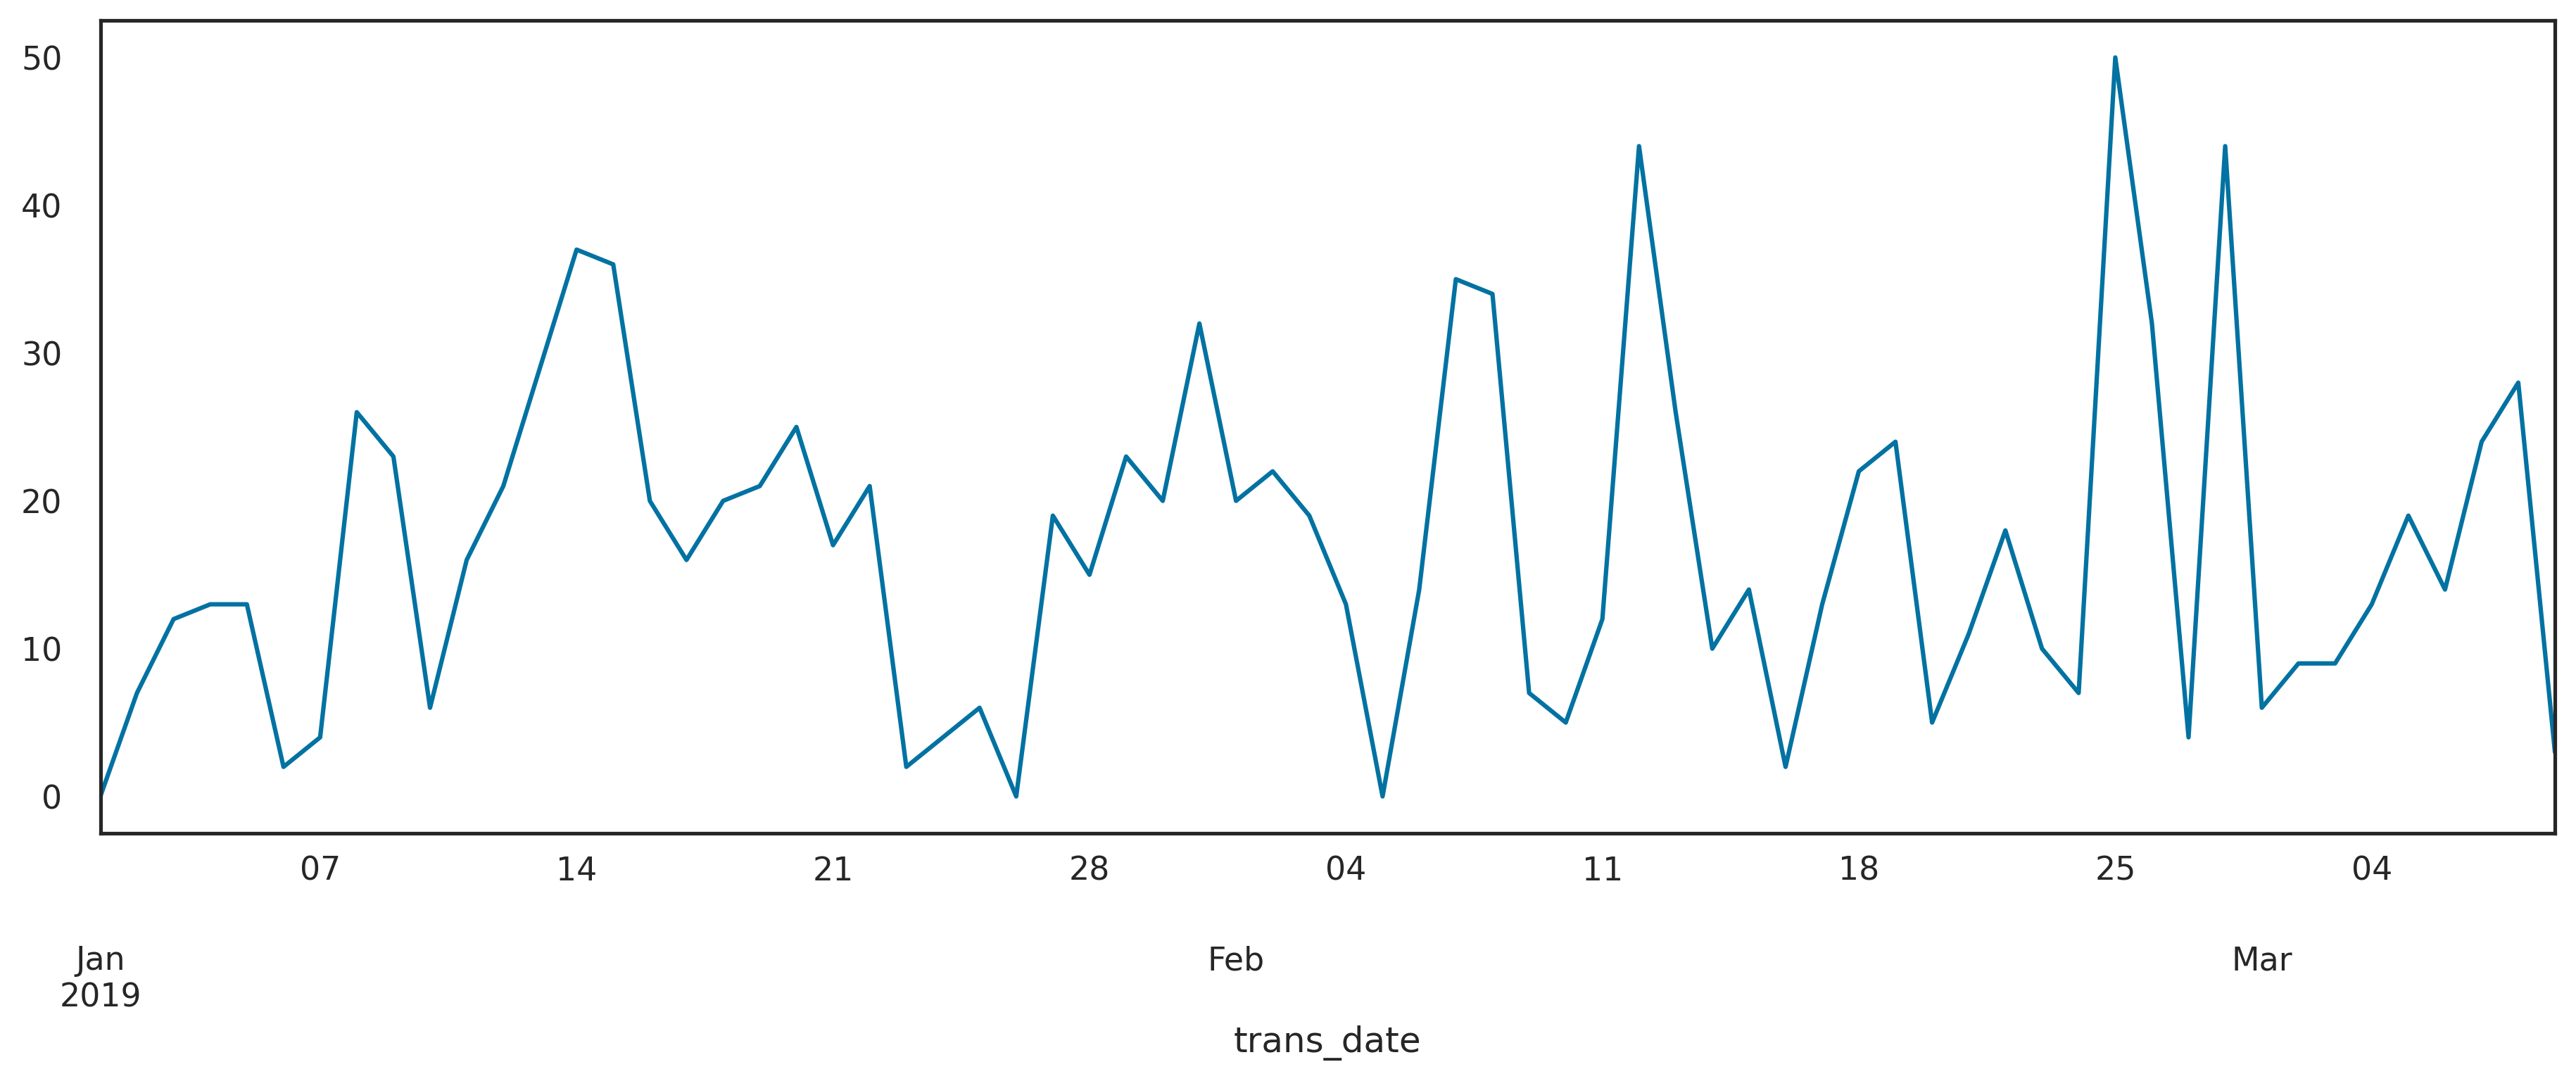

In [ ]:
# Fraud Vs trans_date
fraud['trans_date'] =  pd.to_datetime(fraud['trans_date'])
plt.figure(figsize=[15,5])
fraud.groupby(['trans_date'])['is_fraud'].sum().plot()
plt.show()

Now its time to change date and time to a format more acceptable for modelling. Before that, lets pull some stats required for Cost sheet. Also, it may be noticed that the train data is for 1.5 years (full 2019 till mid of 2020) and test data is for last 6 months of 2020. This way we will be able to build model on 1.5 year of data and test it on future data and hence check model performance in future. We will do the Cost Benifit analysis on the entire data.

In [ ]:
# Total number of months
date_fraud = fraud.trans_date
date_fraud_test = pd.to_datetime(fraud_test.trans_date)
date_fraud = date_fraud.dt.to_period('M')
date_fraud_test = date_fraud_test.dt.to_period('M')
date = pd.concat([date_fraud, date_fraud_test])
print ('total number of records in file: ', date.size)

total number of records in file:  291301


In [ ]:
print ('Total number of months: ', date.value_counts().size)

Total number of months:  6


In [ ]:
print ('Average transactions per month: ', round(date.size/date.value_counts().size,0) )

Average transactions per month:  48550.0


In [ ]:
# Extracting fraud data
temp1 = fraud[['amt', 'is_fraud']]
temp2 = fraud_test[['amt', 'is_fraud']]
temp = pd.concat([temp1, temp2])
temp.shape

(291301, 2)

In [ ]:
# Average frauds per month
fraud_temp = temp[temp.is_fraud == 1]
print ('Average fraud transactions per month: ', round(fraud_temp.shape[0]/ date.value_counts().size,0))

Average fraud transactions per month:  311.0


In [ ]:
# Average amount per fraud transaction
print ('Average amount per fraud transaction: ', round(sum(fraud_temp.amt)/ fraud_temp.shape[0], 2))

Average amount per fraud transaction:  507.89


In [ ]:
# Average amount per fraud transaction
print ('max fraud amount : ' , max(fraud_temp.amt))

max fraud amount :  1334.07


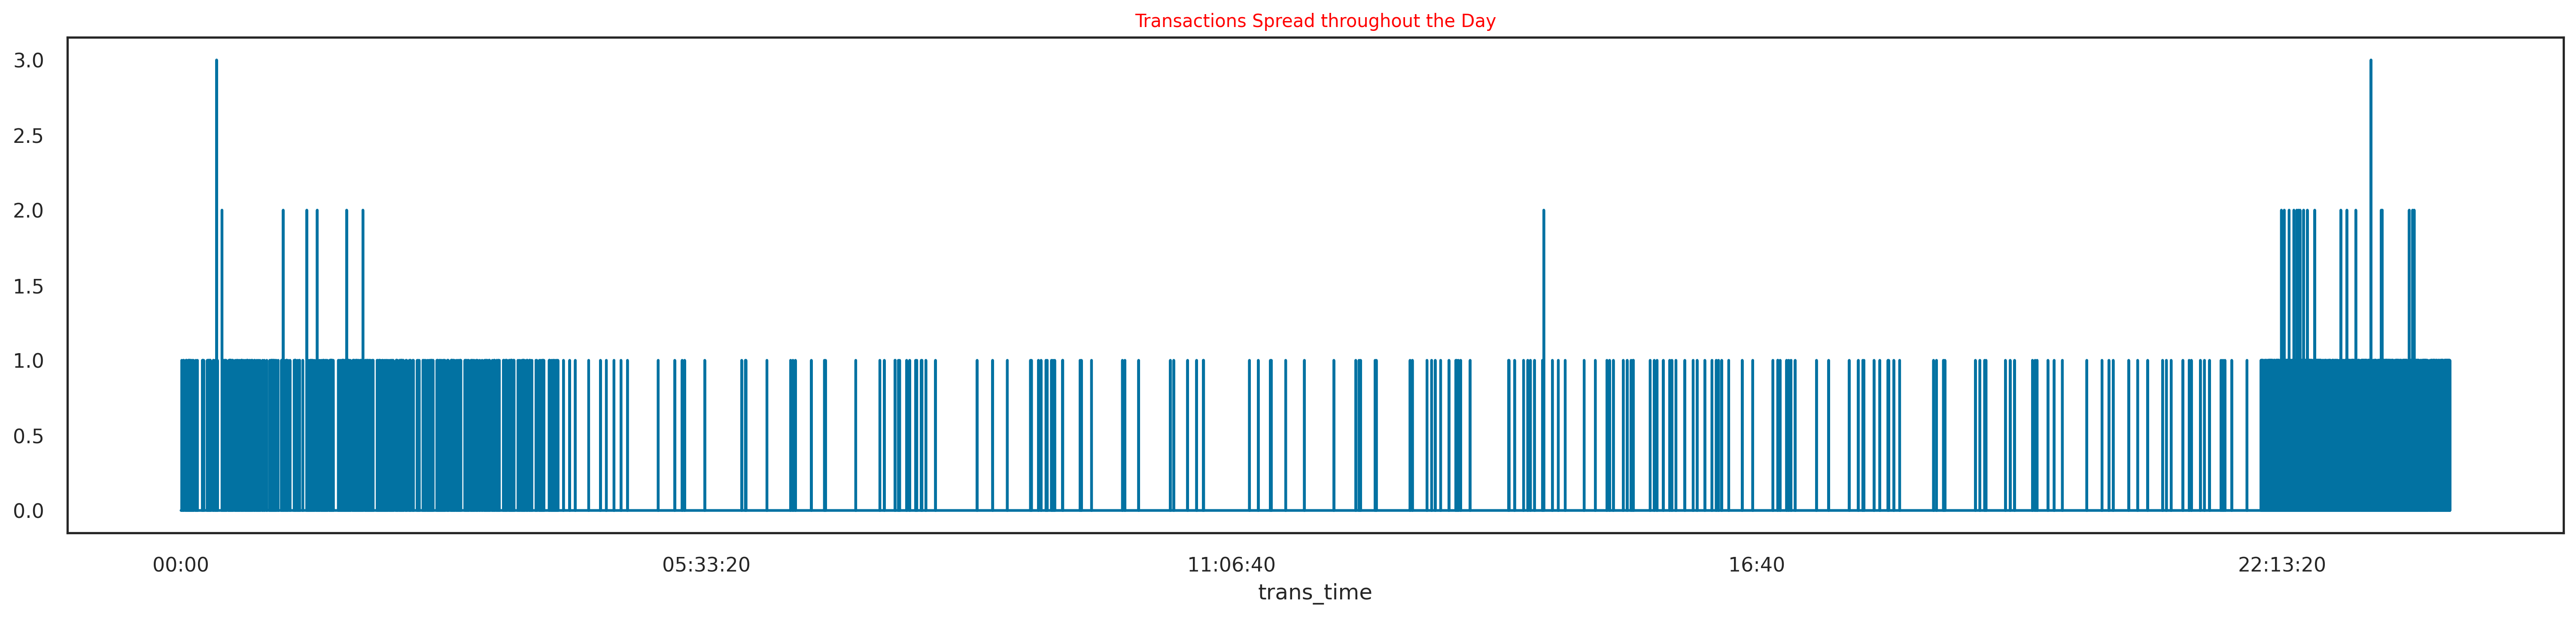

In [ ]:
# Fraud Vs trans_time
import datetime as dt
fraud.trans_date = fraud.trans_date.map(dt.datetime.toordinal)
plt.figure(figsize=[25,5])
plt.title('Transactions Spread throughout the Day', fontsize= 10, color = 'Red', fontweight = 100)
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

So, late nights and early mornings are the most prone time for frauds. Highest frequency of frauds is between 10 pm to 12 am. 12 am to 4:00 am also shows very high frequency of fraud transactions.

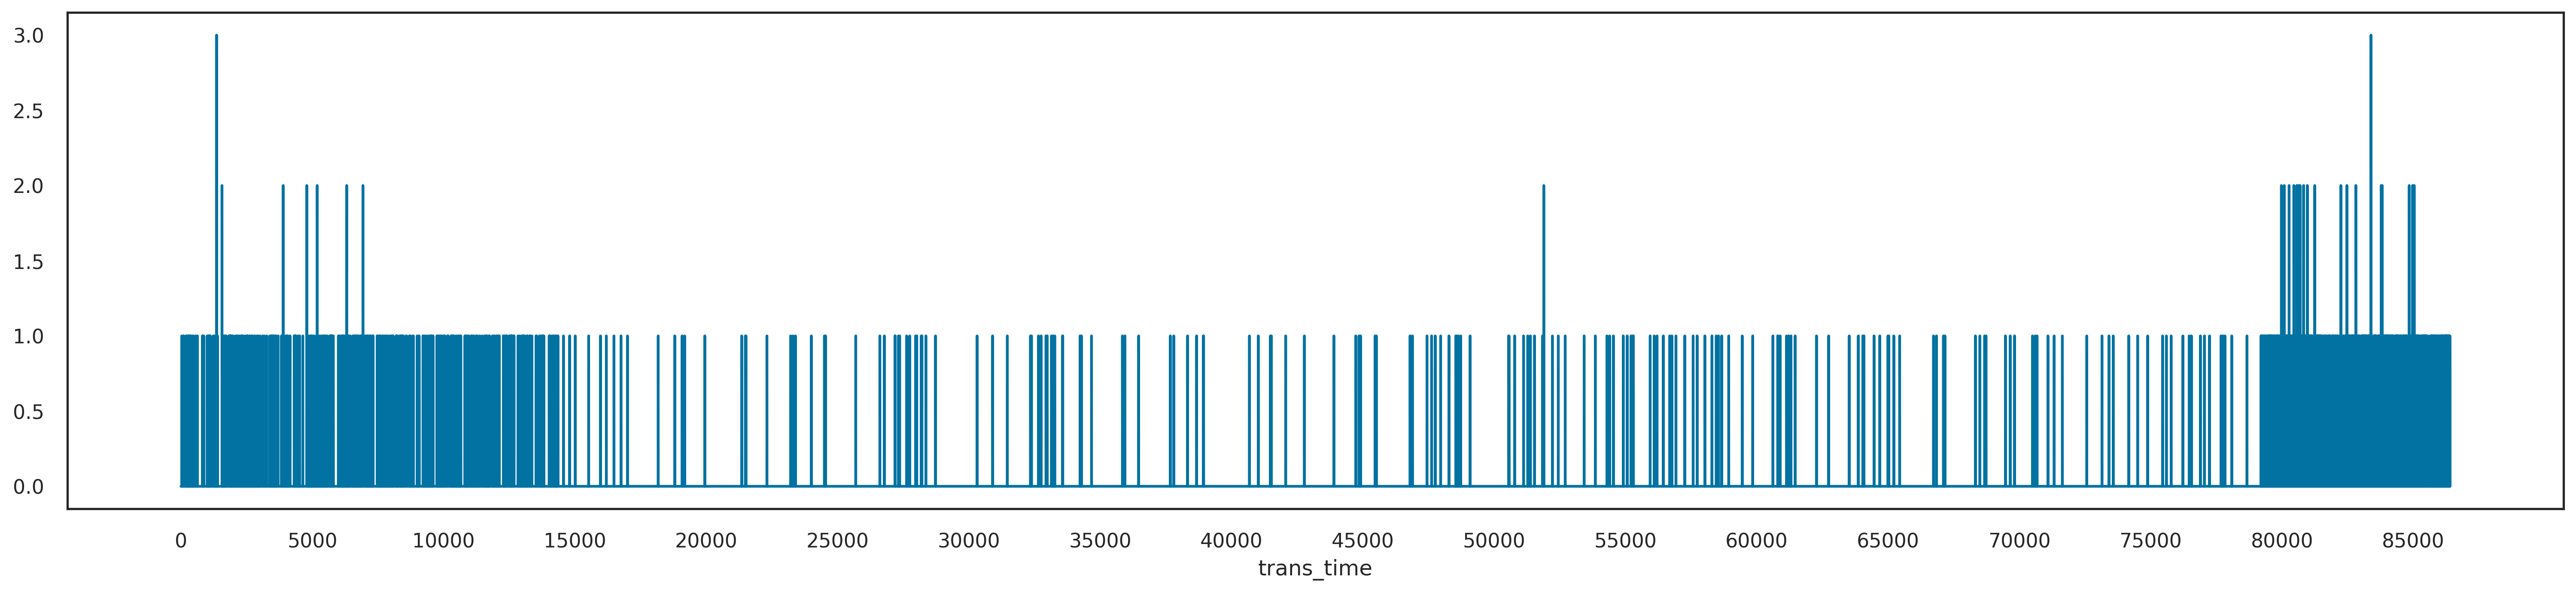

In [ ]:
# Converting trans_time into seconds & ploting the above graph again
fraud.trans_time = pd.to_datetime(fraud.trans_time,format='%H:%M:%S')
fraud.trans_time = 3600 * pd.DatetimeIndex(fraud.trans_time).hour + 60 * pd.DatetimeIndex(fraud.trans_time).minute + pd.DatetimeIndex(fraud.trans_time).second
plt.figure(figsize=[25,5])
plt.xticks(np.arange(0,90000,5000))
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

In [ ]:
# Similar data-time changes in test dataset
fraud_test['trans_date'] =  pd.to_datetime(fraud_test['trans_date'])
fraud_test.trans_date = fraud_test.trans_date.map(dt.datetime.toordinal)
fraud_test.trans_time = pd.to_datetime(fraud_test.trans_time,format='%H:%M:%S')
fraud_test.trans_time = 3600 * pd.DatetimeIndex(fraud_test.trans_time).hour + 60 * pd.DatetimeIndex(fraud_test.trans_time).minute + pd.DatetimeIndex(fraud_test.trans_time).second

In [ ]:
print ('train : ', fraud.shape)
print ('test : ', fraud_test.shape)

train :  (120490, 18)
test :  (170811, 18)


In [ ]:
fraud

merchant  category     amt  gender  city  state    zip      lat  \
0            514         8    4.97       0   500     26  28654  36.0788   
1            241         4  107.23       0   576     46  99160  48.8878   
2            390         0  220.11       1   446     12  83252  42.1808   
3            360         2   45.00       1    81     25  59632  46.2306   
4            297         9   41.96       1   205     44  24433  38.4207   
...          ...       ...     ...     ...   ...    ...    ...      ...   
120485       351         8  136.17       1   570     11  52576  41.2001   
120486       400        12    4.16       0   218     20   4226  44.6084   
120487       209        11    3.28       1   193     40  57732  44.3566   
120488       360         2  105.25       1   772     19  21865  38.2833   
120489       488         2   61.42       0   543      2  71960  34.4596   

            long  city_pop  job     unix_time  merch_lat  merch_long  \
0       -81.1781      3495  360  1.325376e+09  36.011293  -82.048315   
1      -118.2105       149  415  1.325376e+09  49.159047 -118.186462   
2      -112.2620      4154  298  1.325376e+09  43.150704 -112.154481   
3      -112.1138      1939  319  1.325376e+09  47.034331 -112.561071   
4       -79.4629        99  112  1.325376e+09  38.674999  -78.632459   
...          ...       ...  ...           ...        ...         ...   
120485  -92.1354       568   89  1.331270e+09  41.288011  -92.176447   
120486  -70.6993       190   23  1.331270e+09  45.588577  -70.329963   
120487 -103.6999      1979  291  1.331270e+09  43.845186 -103.697327   
120488  -75.8465       470  296  1.331270e+09  37.572639  -76.727930   
120489  -93.6743      1383  272           NaN        NaN         NaN   

        is_fraud  age  trans_date  trans_time  
0            0.0   36      737060          18  
1            0.0   46      737060          44  
2            0.0   62      737060          51  
3            0.0   57      737060          76  
4            0.0   38      737060         186  
...          ...  ...         ...         ...  
120485       0.0   55      737127       18415  
120486       0.0   54      737127       18419  
120487       0.0   54      737127       18433  
120488       0.0   59      737127       18456  
120489       NaN   -1      737127       18509  

[120490 rows x 18 columns]

In [ ]:
corr = fraud.corr()
corr.style.background_gradient(cmap='coolwarm')

# Advance EDA (optional)

In [ ]:
df_train = fraud
df_test = fraud_test

In [ ]:
df_train.rename(columns={"trans_date_trans_time":"transaction_time",
                         "cc_num":"credit_card_number",
                         "amt":"amount(usd)",
                         "trans_num":"transaction_id"},
                inplace=True)

> **Convert datetime columns**   
*transaction_time* and *dob* should be in pd.datetime format and we also convert unix_time to exact timestamp

In [ ]:
# 1. Check if 'transaction_time' or similar column exists and convert to datetime:
transaction_time_col = None
for col in df_train.columns:
    if "transaction" in col.lower() or "time" in col.lower():
        print(f"Found potential 'transaction_time' column: {col}")
        transaction_time_col = col
        df_train[col] = pd.to_datetime(df_train[col], infer_datetime_format=True)
        break  # Exit loop after finding the first potential column

# 2. Check if 'dob' column exists and convert to datetime:
if "dob" in df_train.columns:
    df_train["dob"] = pd.to_datetime(df_train["dob"], infer_datetime_format=True)
else:
    print("Warning: 'dob' column not found in df_train.")

# 3. Print confirmation or warning about 'transaction_time' column:
if transaction_time_col:
    print(f"'{transaction_time_col}' column converted to datetime.")
else:
    print("Warning: No potential 'transaction_time' column found in df_train. Step 4 will be skipped.")

# 4. Perform further operations on 'transaction_time' column (if it exists):
if transaction_time_col:
    # ... your code that uses df_train["transaction_time"] ...
    pass  # Placeholder for your code

Found potential 'transaction_time' column: trans_time


<ipython-input-77-22f0d24be661>:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



'trans_time' column converted to datetime.


In [ ]:
from datetime import datetime
df_train['timestamp'] = pd.to_datetime(df_train['unix_time'], unit='s')

# Apply function utcfromtimestamp and drop column unix_time

df_train.drop('unix_time', axis=1, inplace=True)
df_train['timestamp'] = pd.to_datetime(df_train['unix_time'], unit='s')
# Add cloumn hour of day
df_train['hour_of_day'] = df_train.time.dt.hour

KeyError: 'unix_time'

In [ ]:
df_train[['time','hour_of_day']]

KeyError: "None of [Index(['time', 'hour_of_day'], dtype='object')] are in the [columns]"

> **Convert dtypes**   
Credit card number should be integer, let's change.

In [ ]:
# Change dtypes
df_train.cc_num = df_train.cc_number.astype('category')
df_train.is_fraud = df_train.is_fraud.astype('category')
df_train.hour_of_day = df_train.hour_of_day.astype('category')

# Check
df_train.info()

In [ ]:
np.round(df_train.describe(), 2)

> Quick Summarize using pandas_profiling

In [ ]:
groups = [pd.Grouper(key="transaction_time", freq="1W"), "is_fraud"]
df_ = df_train.groupby(by=groups).agg({"amount(usd)":'mean',"transaction_id":"count"}).reset_index()

In [ ]:
def add_traces(df, x, y,hue, mode, cmap, showlegend=None):
    name_map = {1:"Yes", 0:"No"}
    traces = []
    for flag in df[hue].unique():
        traces.append(
            go.Scatter(
                x=df[df[hue]==flag][x],
                y=df[df[hue]==flag][y],
                mode=mode,
                marker=dict(color=cmap[flag]),
                showlegend=showlegend,
                name=name_map[flag]
            )
        )
    return traces

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    specs=[
                        [{}, {}],
                        [{"colspan":2}, None]
                    ],
                    subplot_titles=("Amount(usd) over time", "Number of transactions overtime",
                                    "Number of transaction by amount(usd)")
                   )

ntraces = add_traces(df=df_,x='transaction_time',y='amount(usd)',hue='is_fraud',mode='lines',
                    showlegend=True, cmap=['#61E50F','#D93C1D'])

for trace in ntraces:
    fig.add_trace(
        trace,
        row=1,col=1
    )

ntraces = add_traces(df=df_,x='transaction_time',y='transaction_id',hue='is_fraud',mode='lines',
                    showlegend=False, cmap=['#61E50F','#D93C1D'])
for trace in ntraces:
    fig.add_trace(
        trace,
        row=1,col=2
    )

ntraces = add_traces(df=df_,x='transaction_id',y='amount(usd)',hue='is_fraud',mode='markers',
                    showlegend=True, cmap=['#61E50F','#D93C1D'])
for trace in ntraces:
    fig.add_trace(
        trace,
        row=2,col=1
    )

fig.update_layout(height=780,
                  width=960,
                  legend=dict(title='Is fraud?'),
                  plot_bgcolor='#fafafa',
                  title='Overview'
                 )

fig.show()

In [ ]:
df_ = df_train.groupby(by=[pd.Grouper(key="transaction_time", freq="1W"),
                           'is_fraud','category']).agg({"amount(usd)":'mean',"transaction_id":"count"}).reset_index()

fig = px.scatter(df_,
        x='transaction_time',
        y='amount(usd)',
        color='is_fraud',
        facet_col ='category',
        facet_col_wrap=3,
        facet_col_spacing=.04,
        color_discrete_map={0:'#61E50F', 1:'#D93C1D'}
)

fig.update_layout(height=1400,
                  width=960,
                  legend=dict(title='Is fraud?'),
                  plot_bgcolor='#fafafa'
                 )

fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True, title=''))

fig.show();

In [ ]:
df_ = df_train.groupby(by=[pd.Grouper(key="transaction_time", freq="1M"),
                           'is_fraud','category']).agg({"amount(usd)":'sum',"transaction_id":"count"}).reset_index()

fig = px.area(
    df_[df_.is_fraud==1],
    x='transaction_time',
    y='amount(usd)',
    color='category',
    color_discrete_sequence=px.colors.qualitative.Dark24
)

fig.update_layout(height=600,
                  width=960,
                  legend=dict(title='Categories'),
                  plot_bgcolor='#fafafa'
                 )

fig.show();

In [ ]:
# Specified list of 12 merchants with the highest number of transactions.
top12_merchants = df_train.merchant.value_counts()[:12]

df_ = df_train.groupby(by=[pd.Grouper(key="transaction_time", freq="1W"),'is_fraud',
                           'merchant']).agg({"amount(usd)":'mean',"transaction_id":"count"}).reset_index()

df_ = df_[df_.merchant.isin(top12_merchants.index)]

In [ ]:
fig = px.scatter(df_,
        x='transaction_time',
        y='amount(usd)',
        color='is_fraud',
        facet_col ='merchant',
        facet_col_wrap=3,
        facet_col_spacing=.06,
        category_orders={'merchant': top12_merchants.index}, # order the subplots
        color_discrete_map={1:'#61E50F', 0:'#D93C1D'}
)

fig.update_layout(height=1200,
                  width=960,
                  title='Top 12 merchants with highest number of transactions per week',
                  legend=dict(title='Is fraud?'),
                  plot_bgcolor='#fafafa'
                 )

fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True, title=''))

fig.show();

In [ ]:
# df_ = df_train[df_train.is_fraud==1].groupby(by='hour_of_day').agg({'transaction_id':'count'}).reset_index()

# fig = px.bar(data_frame=df_,
#        x='hour_of_day',
#        y='transaction_id',
#        labels={'transaction_id':'Number of transaction'})

# fig.update_layout(
#     title=dict(
#         text='Number of FRAUD transactions by hours of day'
#     ),
#     plot_bgcolor='#fafafa'
# )

# fig.update_xaxes(type='category')

In [ ]:
df_train.dtypes

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(18,9))
mask = np.triu(np.ones_like(df_train.corr()))
sns.heatmap(df_train.corr(), mask=mask, cmap='coolwarm', annot=True)

Next, build the model to predict Fraud Transactions(label "1")   
Target: The higher **F1-Score** for label 1, the better the model!

# Model Building

In [ ]:
fraud

In [ ]:
# features = ['hour_of_day', 'category', 'amt', 'merchant', 'job']

features = ['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
        'age', 'trans_date', 'trans_time']

#
# X = df_train[features].set_index("transaction_id")
X = fraud[features]
y = fraud['is_fraud']

print('X shape:{}\ny shape:{}'.format(X.shape,y.shape))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
np.random.seed(10)
x = np.random.rand(100) * 1000  # Amount
age = np.random.randint(18, 75, 100)  # Age
zip_codes = np.random.randint(10000, 99999, 100)  # Zip code (assuming US format)
trans_dates = np.random.randint(2022, 2025, 100).astype('datetime64[D]')  # Transaction date

# Create subplots and set titles
plt.figure(figsize=[15, 8])
plt.suptitle('Distribution of Variables', fontsize=14, fontweight='bold')

plt.subplot(2, 2, 1)
plt.title('Distribution of Amount', fontsize=10, color='red', fontweight='bold')
plt.hist(x)

plt.subplot(2, 2, 2)
plt.title('Distribution of Age', fontsize=10, color='red', fontweight='bold')
plt.hist(age)

plt.subplot(2, 2, 3)
plt.title('Distribution of Zip Code', fontsize=10, color='red', fontweight='bold')
plt.hist(zip_codes)

plt.subplot(2, 2, 4)
plt.title('Distribution of Transaction Date', fontsize=10, color='red', fontweight='bold')
plt.hist(trans_dates)

# Remove extra space between subplots
plt.tight_layout()

plt.show()


In [ ]:
# Check distribution of few variables
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.age)
plt.subplot(2,2,3)
plt.title('Distribution of Zip', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.zip)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X.trans_date)
plt.show()

In [ ]:
# Lets try various scalers available in Scikit library. At optimum time, will finalize one.
# Based on various test results, QuantileTransformer with Gaussian distribution seems best suited.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = PowerTransformer()
scaler = QuantileTransformer(output_distribution='normal')
#scaler = RobustScaler()

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# enc = OrdinalEncoder(dtype=np.int64)
# enc.fit(X.loc[:,['category','merchant','job']])

# X.loc[:, ['category','merchant','job']] = enc.transform(X[['category','merchant','job']])

In [ ]:
X[['category','merchant','job']]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
fig = plt.figure(figsize=(8,6))
cfs_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))

In [ ]:
print(classification_report(y_test, y_pred))

With DecisionTree we have F1-Score = **0.84** for label 1

**SMOTE**

In [ ]:
print("Before SMOTE:", Counter(y_train))

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={1:48050}, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

In [ ]:
class test_model:
    from sklearn.metrics import classification_report
    def __init__(self):
        self.metrics = ['prfs','auc','acc']

    def fit_predict(model, X_train, X_test, y_train, y_test):
        model = model
        model.fit(X_train, y_train) #Fit data to model
        y_pred = model.predict(X_test)
        return y_pred

    def evaluate(y_pred, metrics):
        results = {}
        for metric in metrics:
            if metric == 'prfs':
                prfs = classification_report(y_test, y_pred)
                results['prfs'] = prfs
            elif metric =='auc':
                auc_score = roc_auc_score(y_test, y_pred)
                results['auc'] = auc_score
            elif metric =='acc':
                results['acc'] = accuracy_score(y_test, y_pred)
            else:
                print('Not available metric!')
        return results

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={1:48050}, random_state=42)

In [ ]:
class test_model:
    from sklearn.metrics import classification_report
    def __init__(self):
        self.metrics = ['prfs','auc','acc']

    def fit_predict(model, X_train, X_test, y_train, y_test):
        model = model
        model.fit(X_train, y_train) #Fit data to model
        y_pred = model.predict(X_test)
        return y_pred

    def evaluate(y_pred, metrics):
        results = {}
        for metric in metrics:
            if metric == 'prfs':
                prfs = classification_report(y_test, y_pred)
                results['prfs'] = prfs
            elif metric =='auc':
                auc_score = roc_auc_score(y_test, y_pred)
                results['auc'] = auc_score
            elif metric =='acc':
                results['acc'] = accuracy_score(y_test, y_pred)
            else:
                print('Not available metric!')
        return results

With RandomForestClassifier we have better **F1-Score = 0.88** for label 1.

Try tuning some important Hyperparameters for RDF

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

print(random_grid)

In [ ]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, greater_is_better=True, pos_label=1)

The best estimator on randomized_search:  
RandomForestClassifier(max_features='sqrt', n_estimators=200)

In [ ]:
rf_random = RandomForestClassifier(max_features='sqrt',
                                   n_estimators=200,
                                   random_state=41
                                   )

rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

# Print reprort
print(classification_report(y_test, y_pred))

After tuning, we have **F1-Score = 0.8** for label 1, atually good :)

****Test Data Prediction****

In [ ]:
fraud_test = scaler.fit_transform(fraud_test)

In [ ]:
features = ['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
        'age', 'trans_date', 'trans_time']

#
# X = df_train[features].set_index("transaction_id")
# fraud_test = fraud_test[features]

In [ ]:
fraud_test

In [ ]:
df_test["Fraud_Proba"] = y_proba
df_test["Fraud_Predict"] = y_pred

In [ ]:
# Check if columns exist before selecting them
if all(col in df_test.columns for col in ["Fraud_Proba", "Fraud_Predict"]):
  result = df_test[["Fraud_Proba", "Fraud_Predict"]]
  # Store result in a CSV file
  result.to_csv(r"./PredictFraud_Result.csv", index=False)  # Avoids saving index in CSV
else:
  print("Columns 'Fraud_Proba' or 'Fraud_Predict' not found in df_test")
